In [1]:
import os
import pandas as pd
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy.optimize import curve_fit 


In [2]:
# надо проверить что можно просто дописывать таблицу к таблице, возможно есть проблемы с одинаковыми id или еще что-от
#вроде проверила что все должно быть ок

def get_solution_log(start):
    solution_log = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'solution_log.csv':
                name = os.path.join(root,f)
                solution_log = solution_log.append(pd.read_csv(name))
    return solution_log
                
def get_user_element_progress(start):
    user_element_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_element_progress.csv':
                name = os.path.join(root,f)
                user_element_progress = user_element_progress.append(pd.read_csv(name))
    return user_element_progress

def get_user_module_progress(start):
    user_module_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_module_progress.csv':
                name = os.path.join(root,f)
                user_module_progress = user_module_progress.append(pd.read_csv(name))
    return user_module_progress




In [3]:
start = '/Users/sinya/Desktop/CS центр/Практика Сириус/courses'

user_element_progress = get_user_element_progress(start)
solution_log = get_solution_log(start)


/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_17978/2428949225.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_17978/2428949225.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_17978/2428949225.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_17978/2428949225.py:19: FutureWarning: The frame.append method is depre

In [4]:

df_merged = pd.merge(user_element_progress, solution_log,
                       how='left', left_on='id', right_on = 'element_progress_id')
df_merged = df_merged[df_merged['achieve_reason']=='solved']

In [5]:
df_best = df_merged

In [7]:
df_best.head(40)

,id_x,user_id,course_id,course_module_id,course_element_type,course_element_id,progress_current,is_achieved,tries_count_x,module_progress_id,...,time_achieved,time_started,achieve_reason,id_y,tries_count_y,hints_used,score,submission_time,element_progress_id,verdict
121,27223847,100119810111097766,92,1277,task,983,1.0,t,3.0,1444241,...,2020-03-30 07:27:04.69925,NaN,solved,7576003.0,1.0,0.0,0.0,2020-03-30 07:26:55.933777,27223847.0,wrong
122,27223847,100119810111097766,92,1277,task,983,1.0,t,3.0,1444241,...,2020-03-30 07:27:04.69925,NaN,solved,7576012.0,2.0,0.0,0.0,2020-03-30 07:26:59.636699,27223847.0,wrong
123,27223847,100119810111097766,92,1277,task,983,1.0,t,3.0,1444241,...,2020-03-30 07:27:04.69925,NaN,solved,7576022.0,3.0,0.0,1.0,2020-03-30 07:27:04.69925,27223847.0,ok
124,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7572910.0,3.0,0.0,0.0,2020-03-30 07:03:38.150557,27223846.0,wrong
125,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7572916.0,4.0,0.0,0.0,2020-03-30 07:03:40.944696,27223846.0,wrong
126,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7572779.0,1.0,0.0,0.0,2020-03-30 07:02:32.014168,27223846.0,wrong
127,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7572905.0,2.0,0.0,0.0,2020-03-30 07:03:34.714612,27223846.0,wrong
128,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7572922.0,5.0,0.0,0.0,2020-03-30 07:03:43.578669,27223846.0,wrong
129,27223846,100119810111097766,92,1277,task,982,1.0,t,6.0,1444241,...,2020-03-30 07:26:30.515407,NaN,solved,7575961.0,6.0,0.0,1.0,2020-03-30 07:26:30.515407,27223846.0,ok
130,27223854,100119810111097766,92,1277,task,3637,0.0,t,1.0,1444241,...,2020-04-04 08:50:21.305895,NaN,solved,8439035.0,1.0,0.0,0.0,2020-04-04 08:50:21.305895,27223854.0,ok


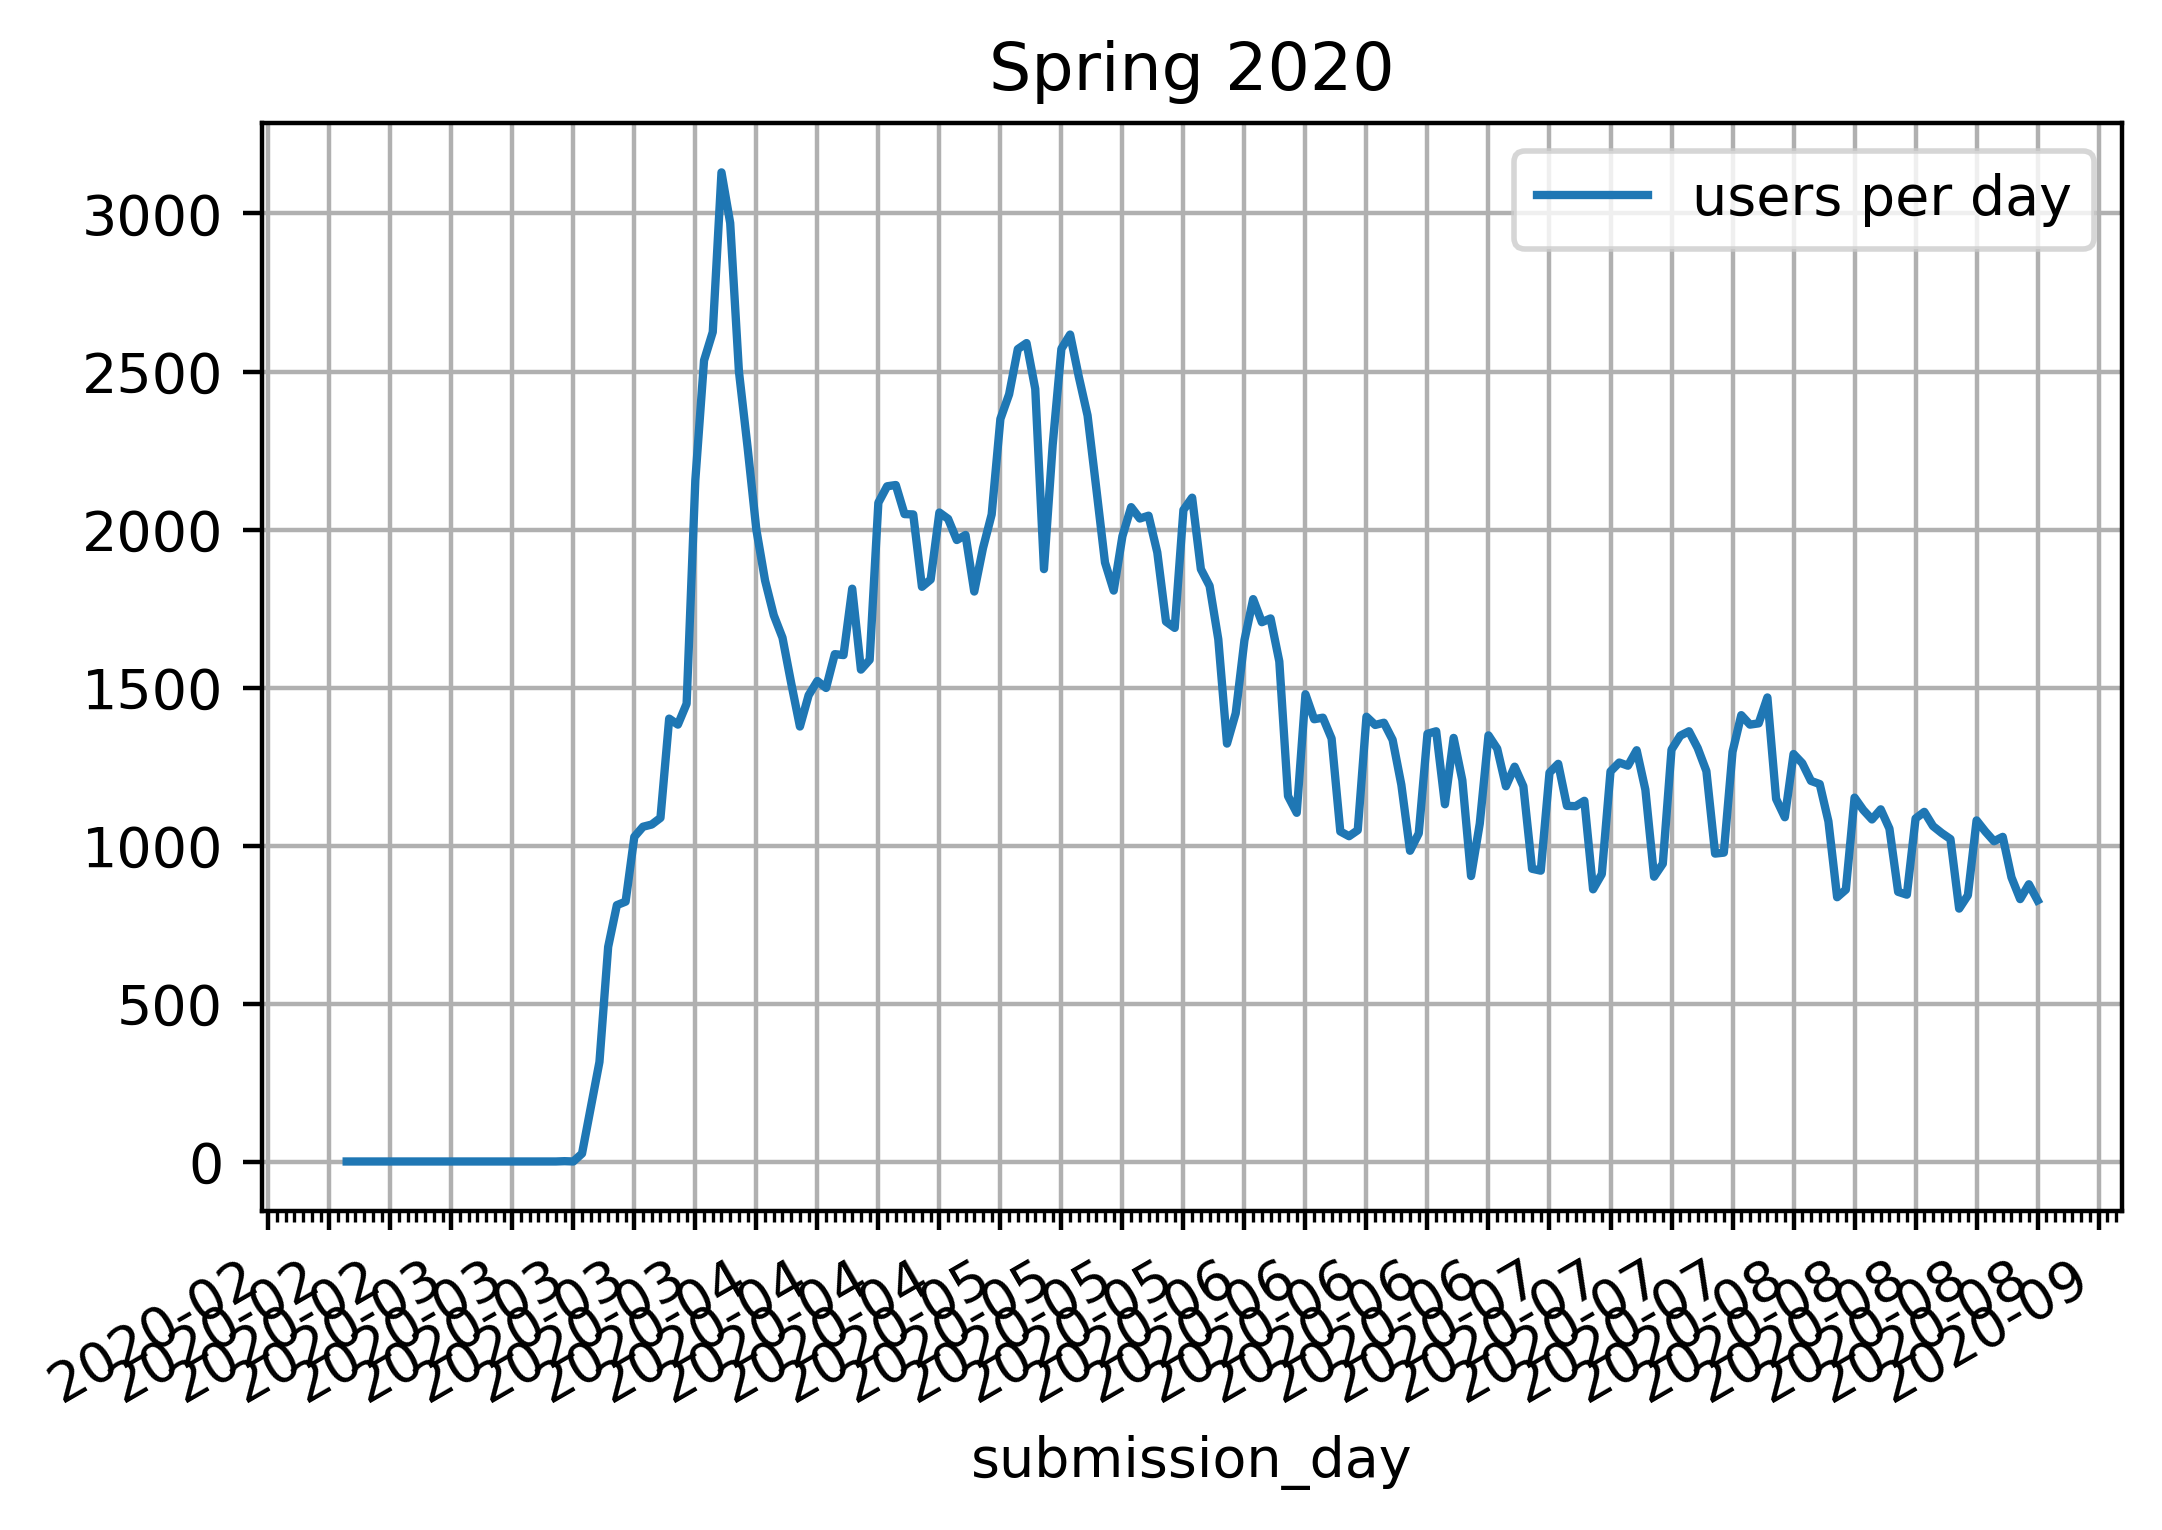

In [6]:
# DayActiveUsers сколько людей в день хоть что-то постило
tasks = df_merged[df_merged['course_element_type']=='task'].sort_values('submission_time')  
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
dau = tasks.groupby('submission_day').agg({'user_id': lambda x: len(set(x))})
dau.rename(columns={'user_id': 'users per day'}, inplace=True)

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)
plt.title('Spring 2020')
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

dau.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()

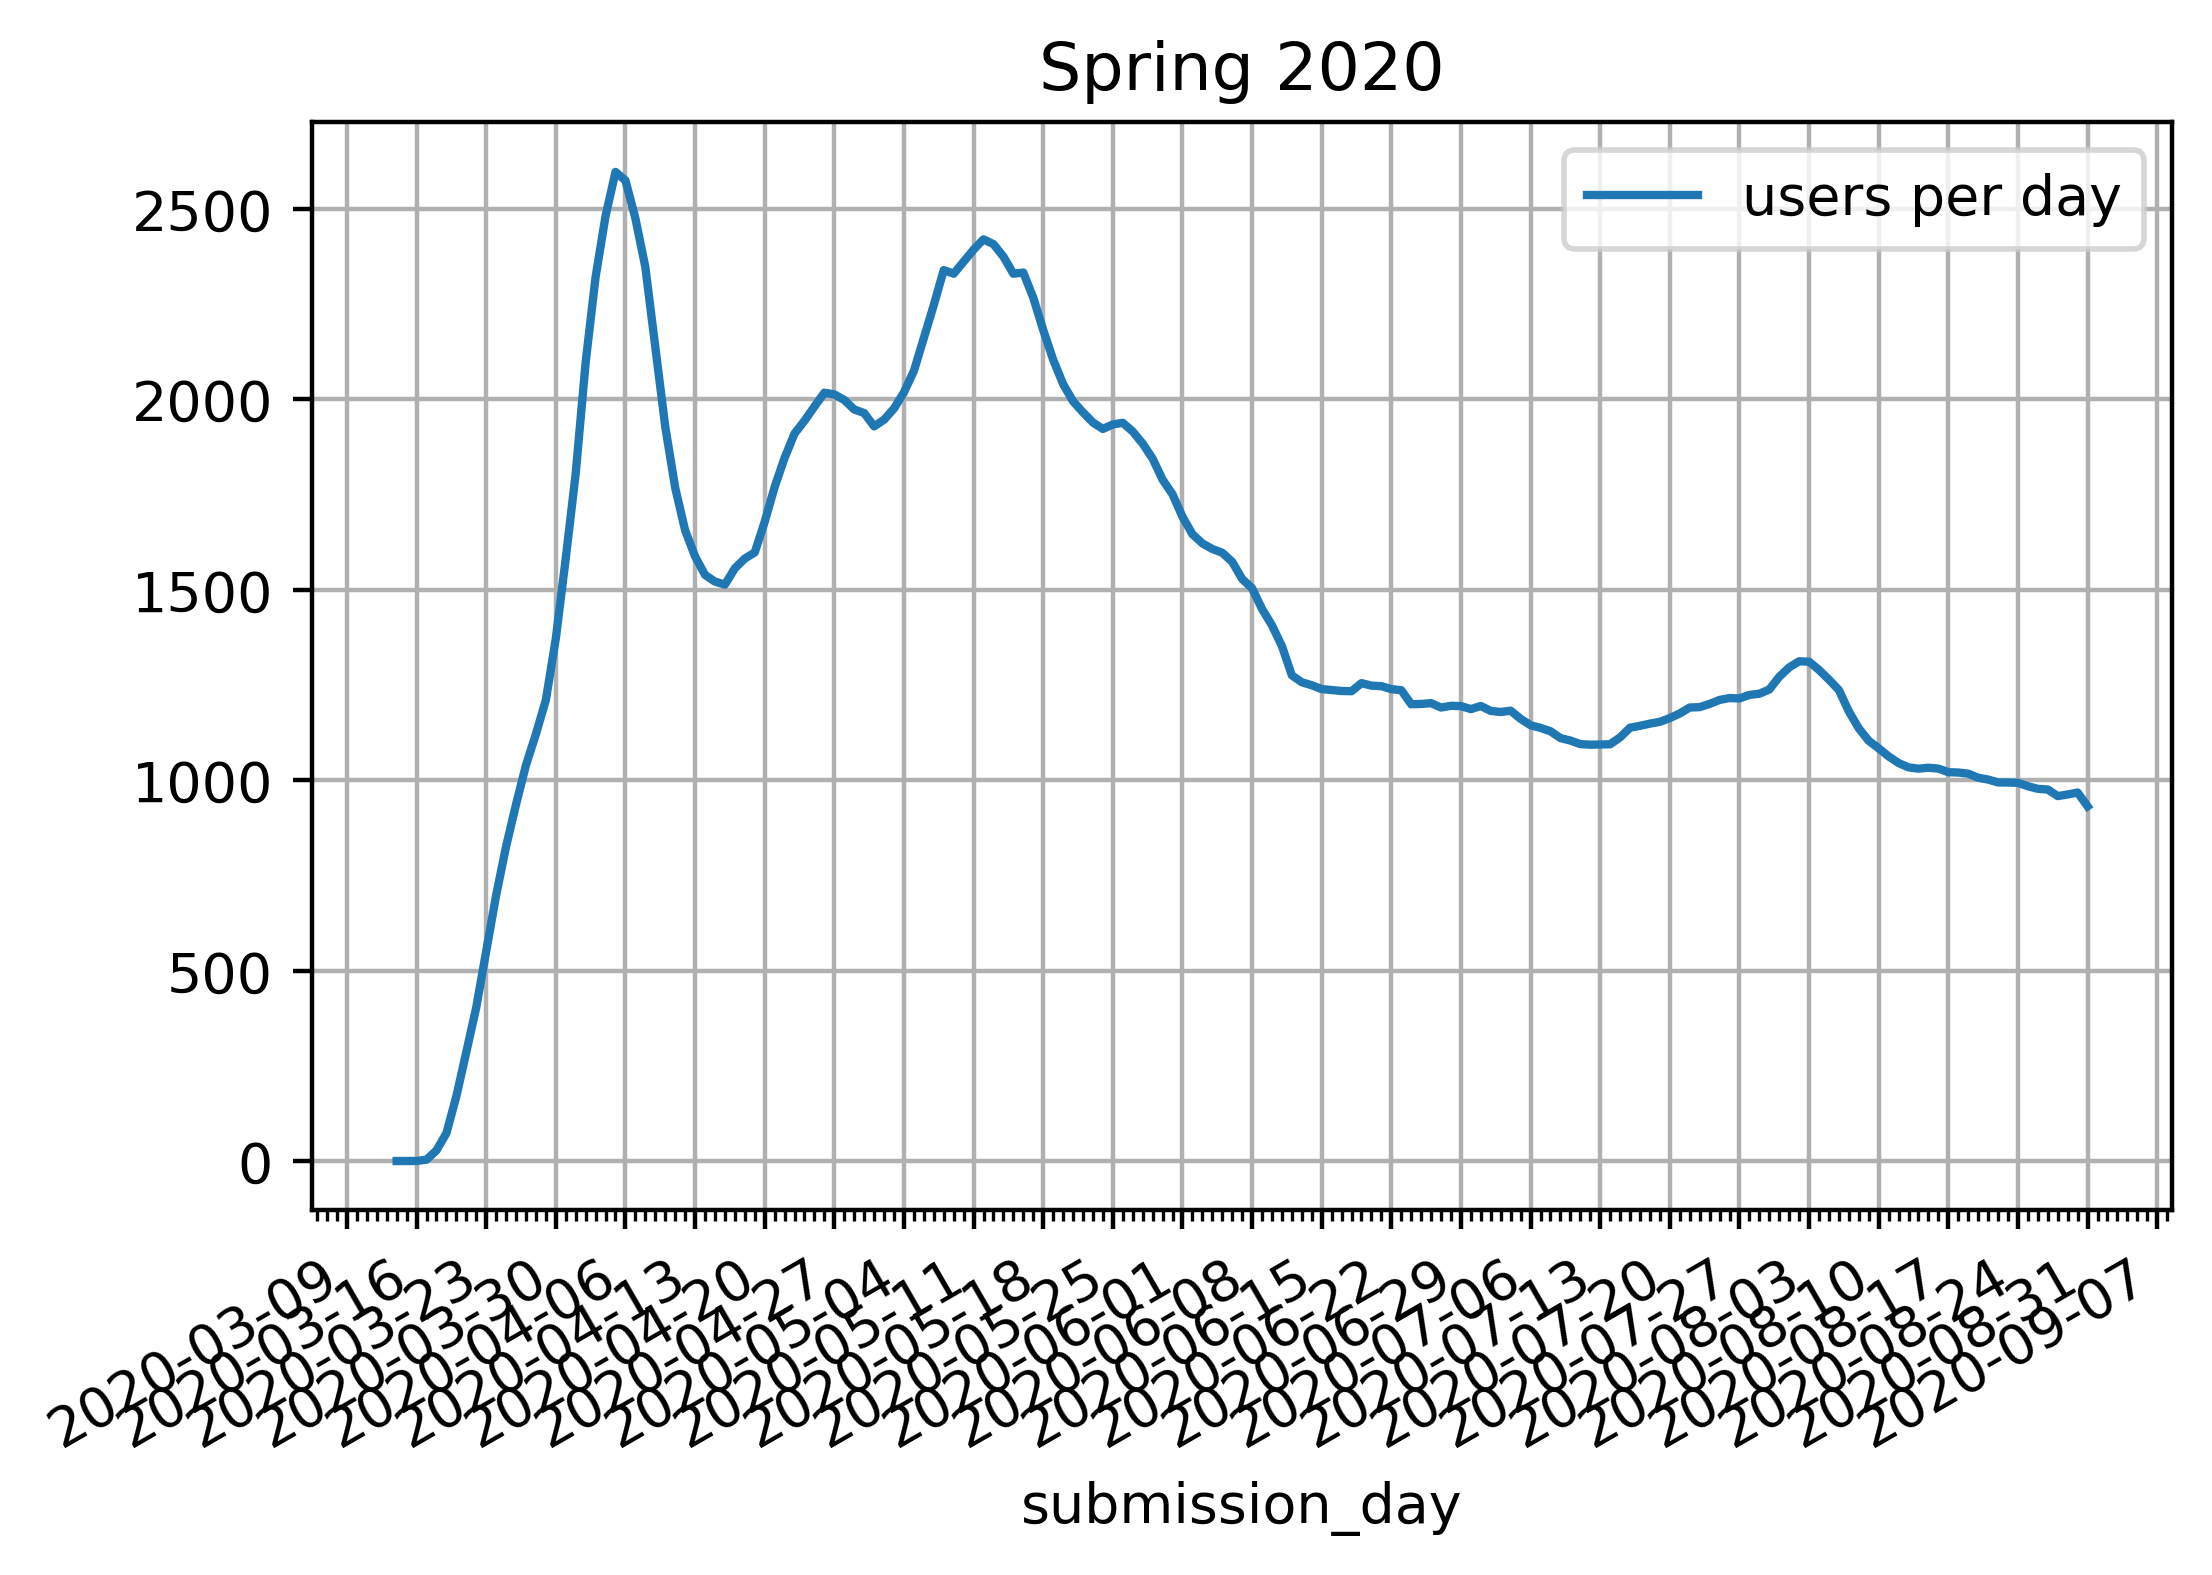

In [7]:
# DayActiveUsers сколько людей в день хоть что-то постило сглаженный

dau = dau.rolling(7).mean()

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Spring 2020')
dau.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()

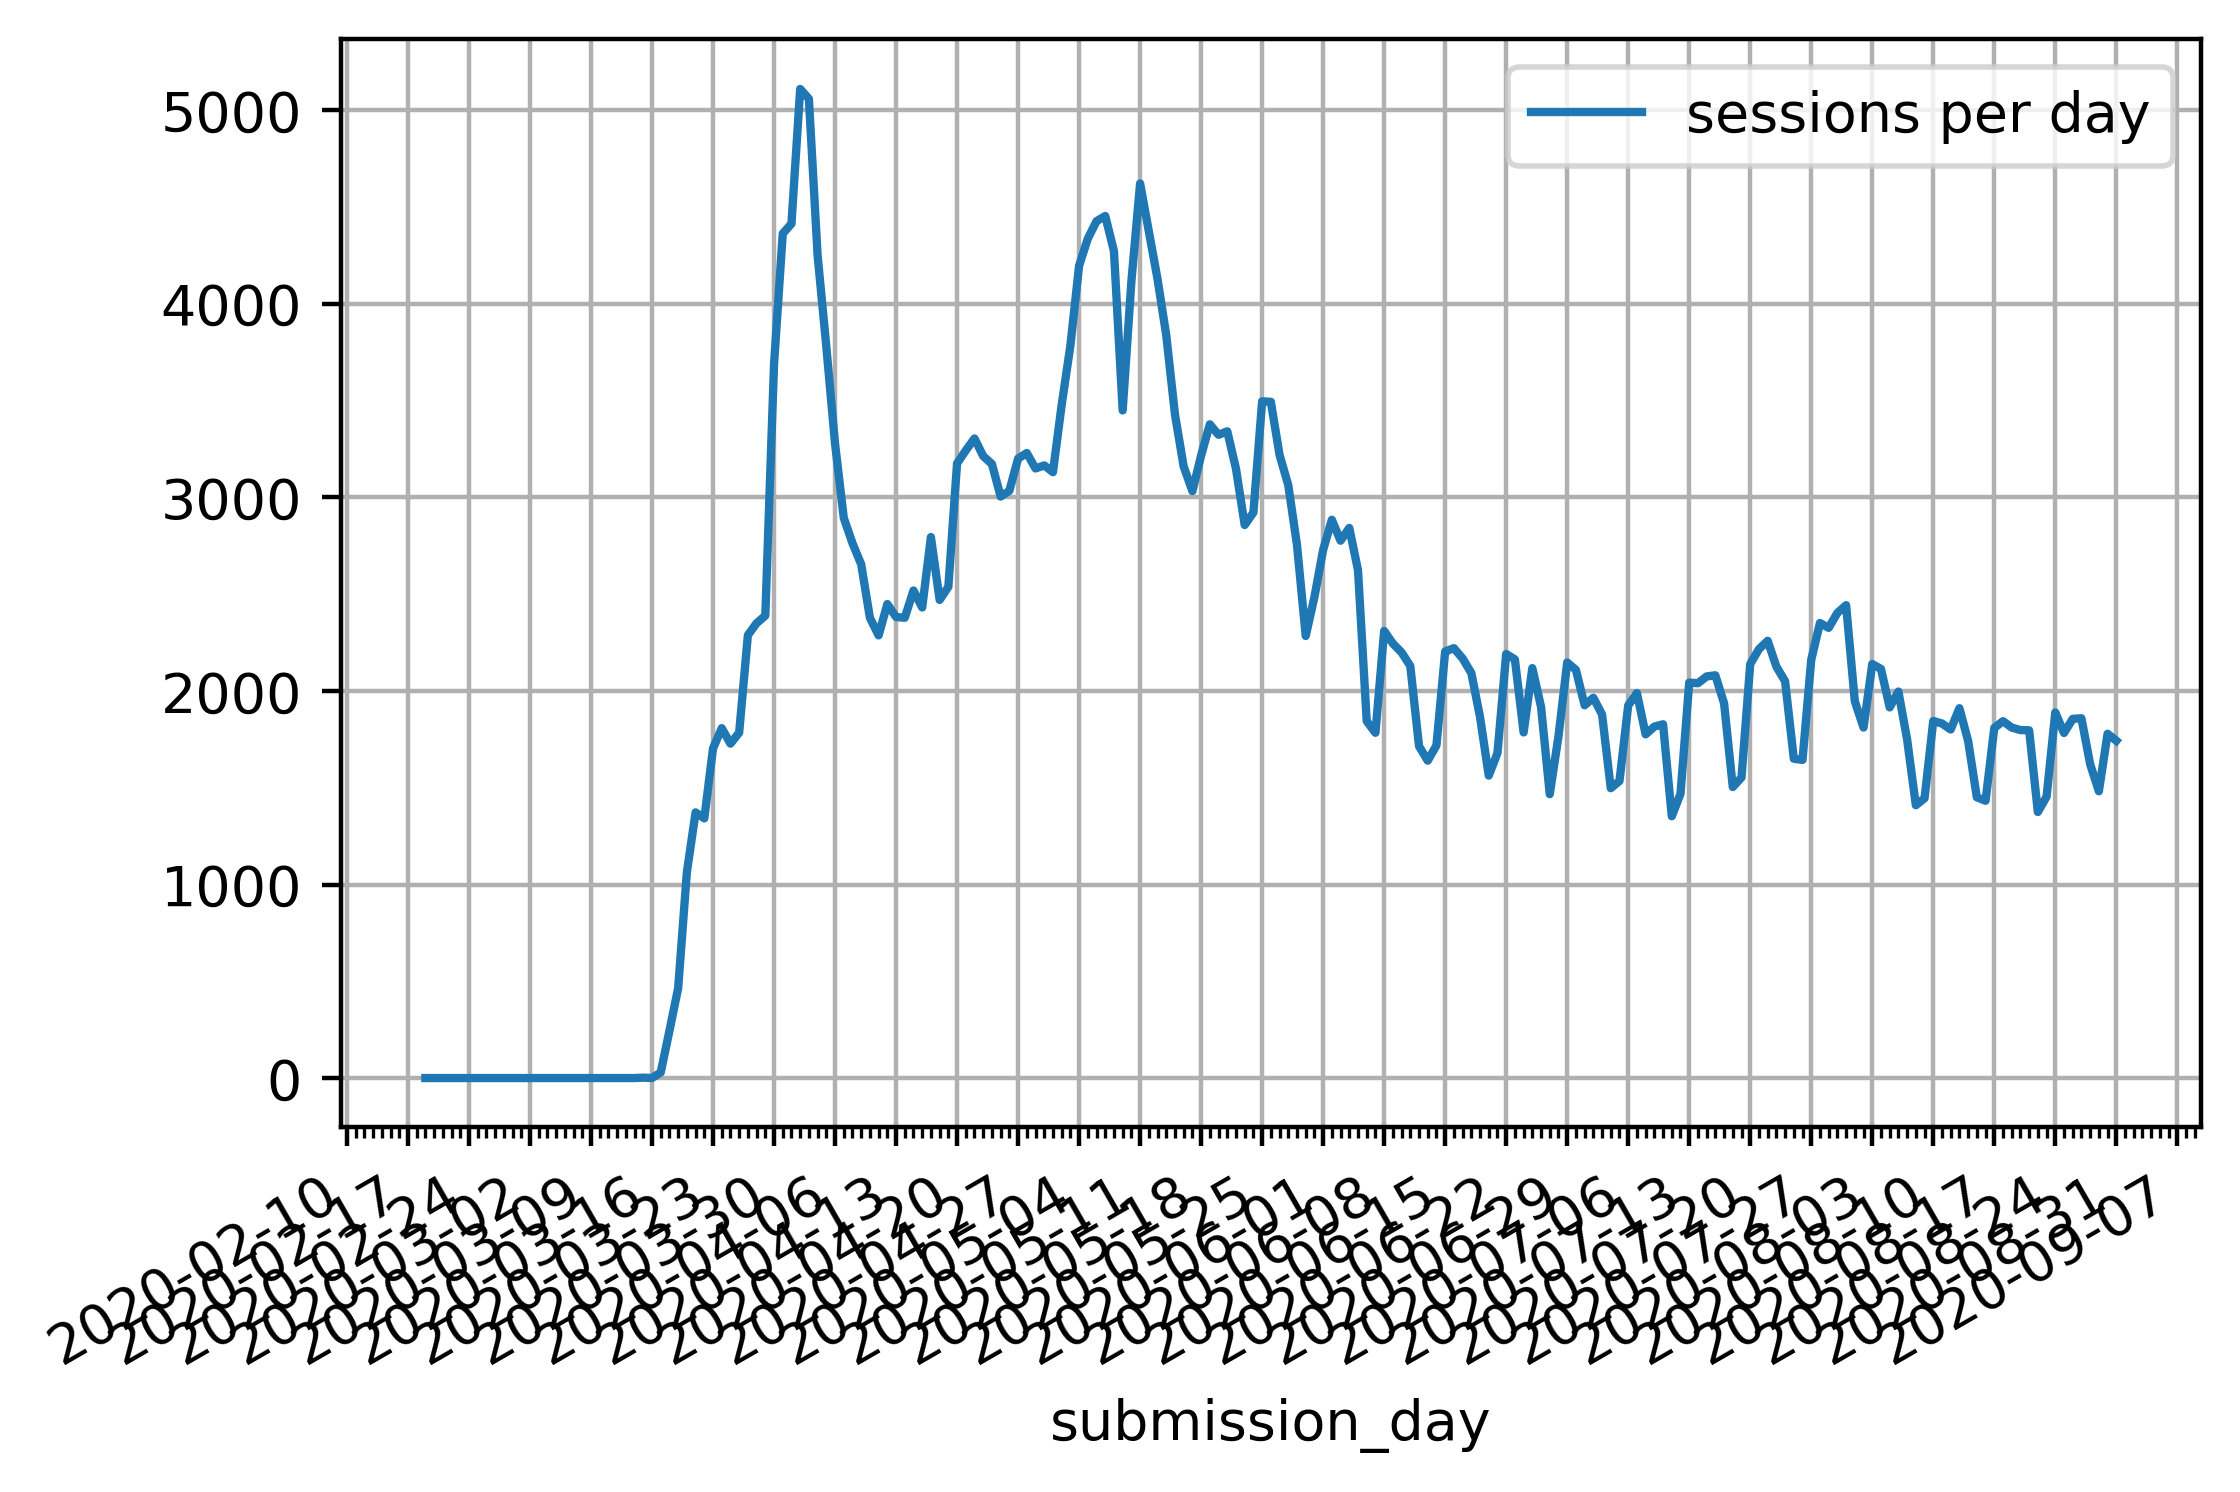

In [7]:
# DayActiveSessions сколько было сессий за день
# Важно: сейчас, сессия пересекающая полночь учитывается в оба дня, возможно надо исправить

def split_session(data , interval = pd.Timedelta('40min')):
    
    sessions = []
    cur_session = [data.values[0]]
    prev_date = data.values[0]

    for cur_date in data.values[1:]:
        if (cur_date - prev_date < interval):
            cur_session.append(cur_date)
        else: 
            sessions.append(cur_session)
            cur_session = [cur_date]
        prev_date = cur_date
        
    sessions.append(cur_session)
    return sessions   # теперь в sessions  у нас хранятся списки временных отметок по сессиям


tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['submission_time'] = sessions['submission_time'].apply(lambda x: len(x))
das = sessions.groupby('submission_day').sum()
das.pop('user_id')
das.rename(columns={'submission_time': 'sessions per day'}, inplace=True)


fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

das.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()




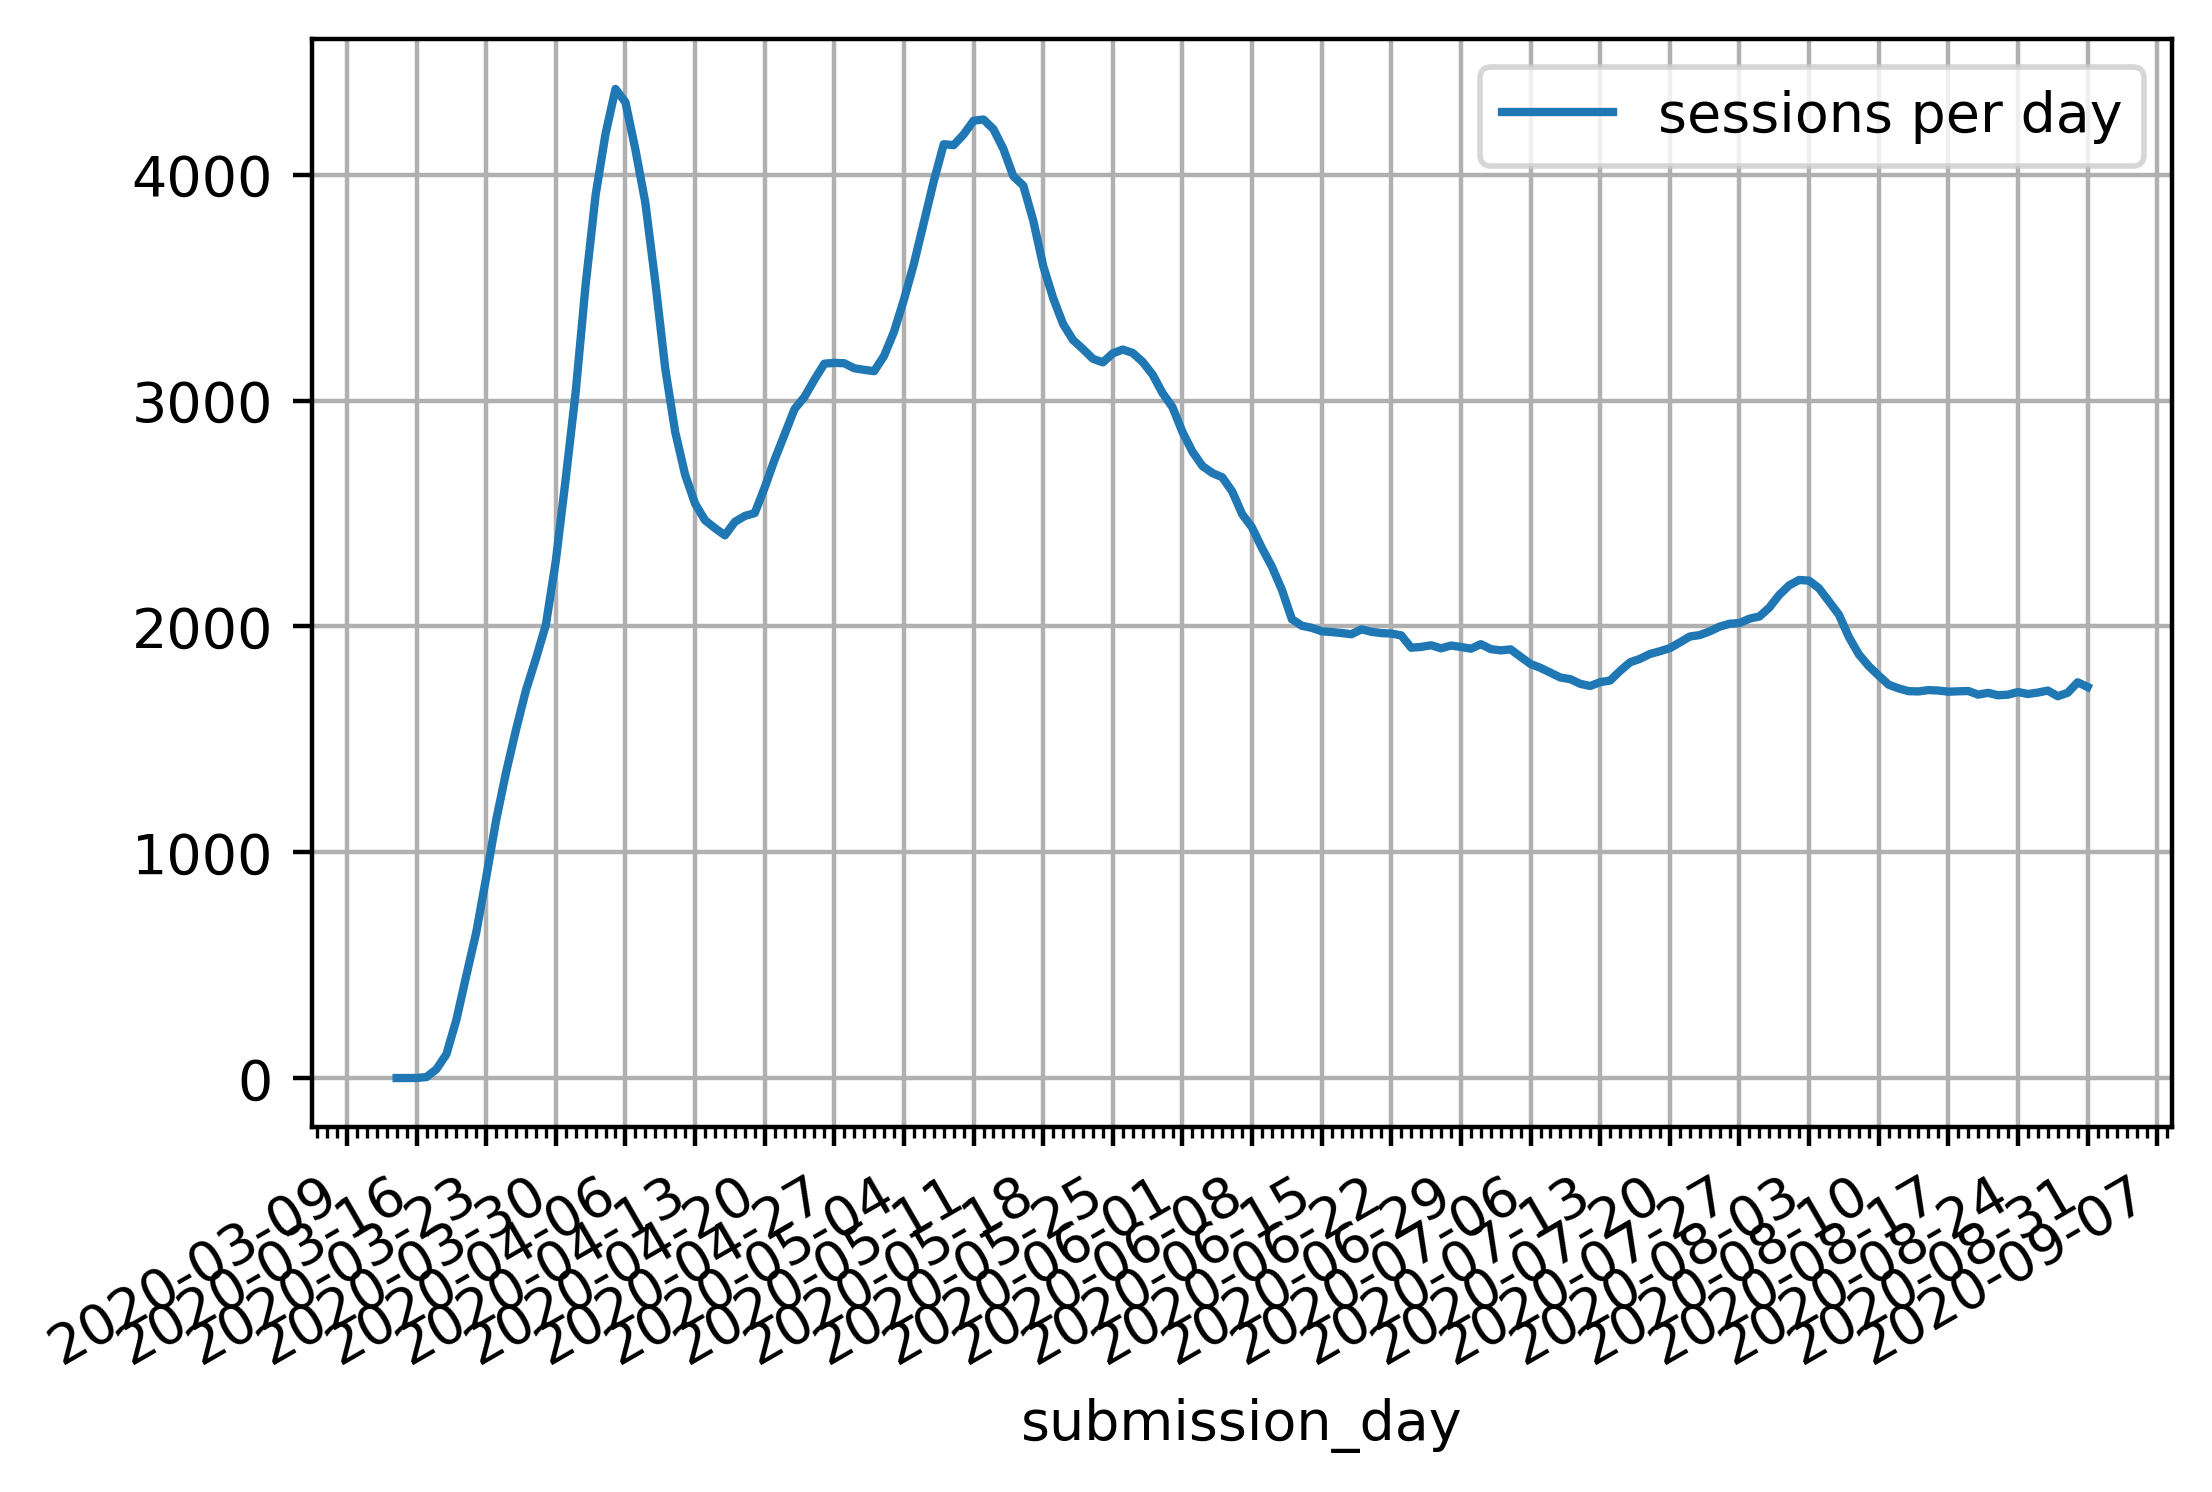

In [9]:
# DayActiveSessions сколько было сессий за день сглаженный

das = das.rolling(7).mean()

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

das.plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()

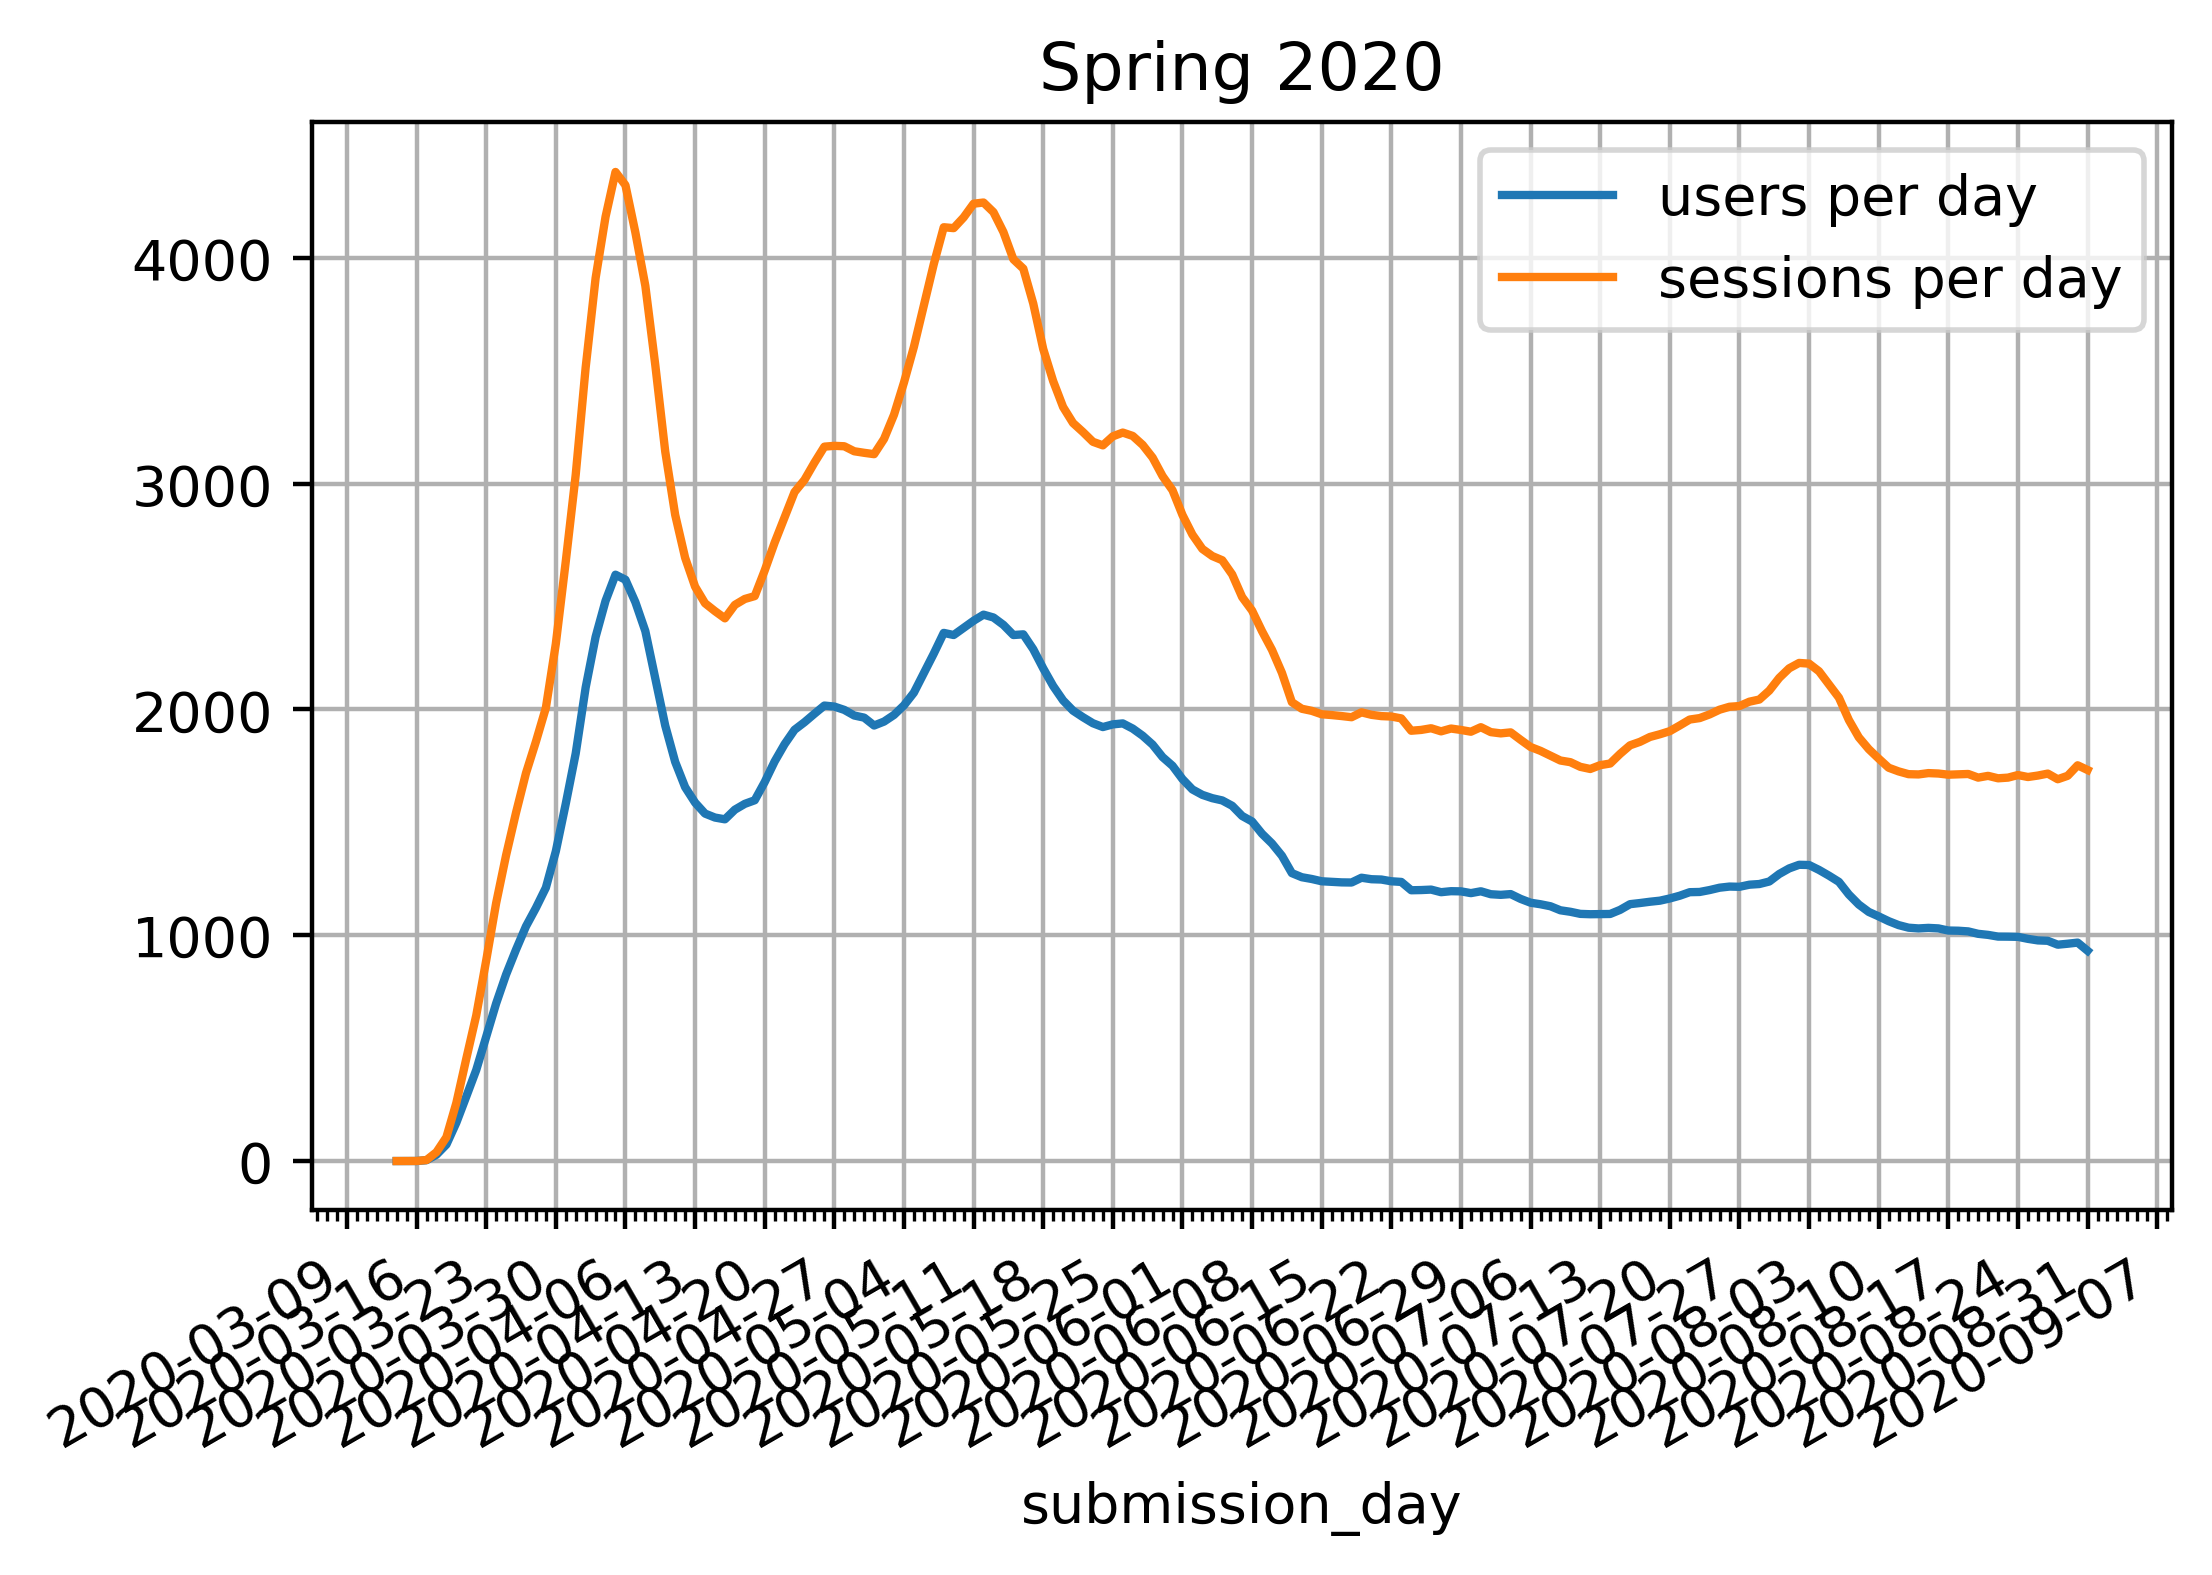

In [19]:
# построим число юзеров число сессий в одних осях, видна огромная корреляция
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

dau.plot(ax=ax)
das.plot(ax=ax)
fig.autofmt_xdate()
plt.title('Spring 2020')
ax.grid(True)

plt.show()



Arguments:  [  1.70620361 -81.23490946]
Co-Variance:  [[ 2.13674788e-04 -3.16625438e-01]
 [-3.16625438e-01  5.18528756e+02]]


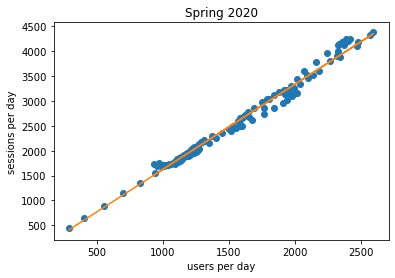

In [26]:
sessions_per_user = das.copy(deep=True)
sessions_per_user['users per day'] = dau['users per day']
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user = sessions_per_user[sessions_per_user['submission_day']>datetime.date(2020,3,20)]
sessions_per_user = sessions_per_user.set_index('submission_day')

values_x = np.array(sessions_per_user['users per day'])
values_y = np.array(sessions_per_user['sessions per day'])

def mapping(values_x, a, b, ): 
    return a * values_x + b 
args, covar = curve_fit(mapping, values_x, values_y) 
print("Arguments: ", args) 
print("Co-Variance: ", covar) 
a, b = args[0], args[1]
y_fit = a * values_x + b 
plt.title('Spring 2020')
plt.plot(values_x,values_y,'o')
plt.plot(values_x, y_fit, label="y = a * x + b") 
plt.ylabel('sessions per day', fontsize=10)
plt.xlabel('users per day', fontsize=10)
plt.show()

<ipython-input-11-29a20a758feb>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


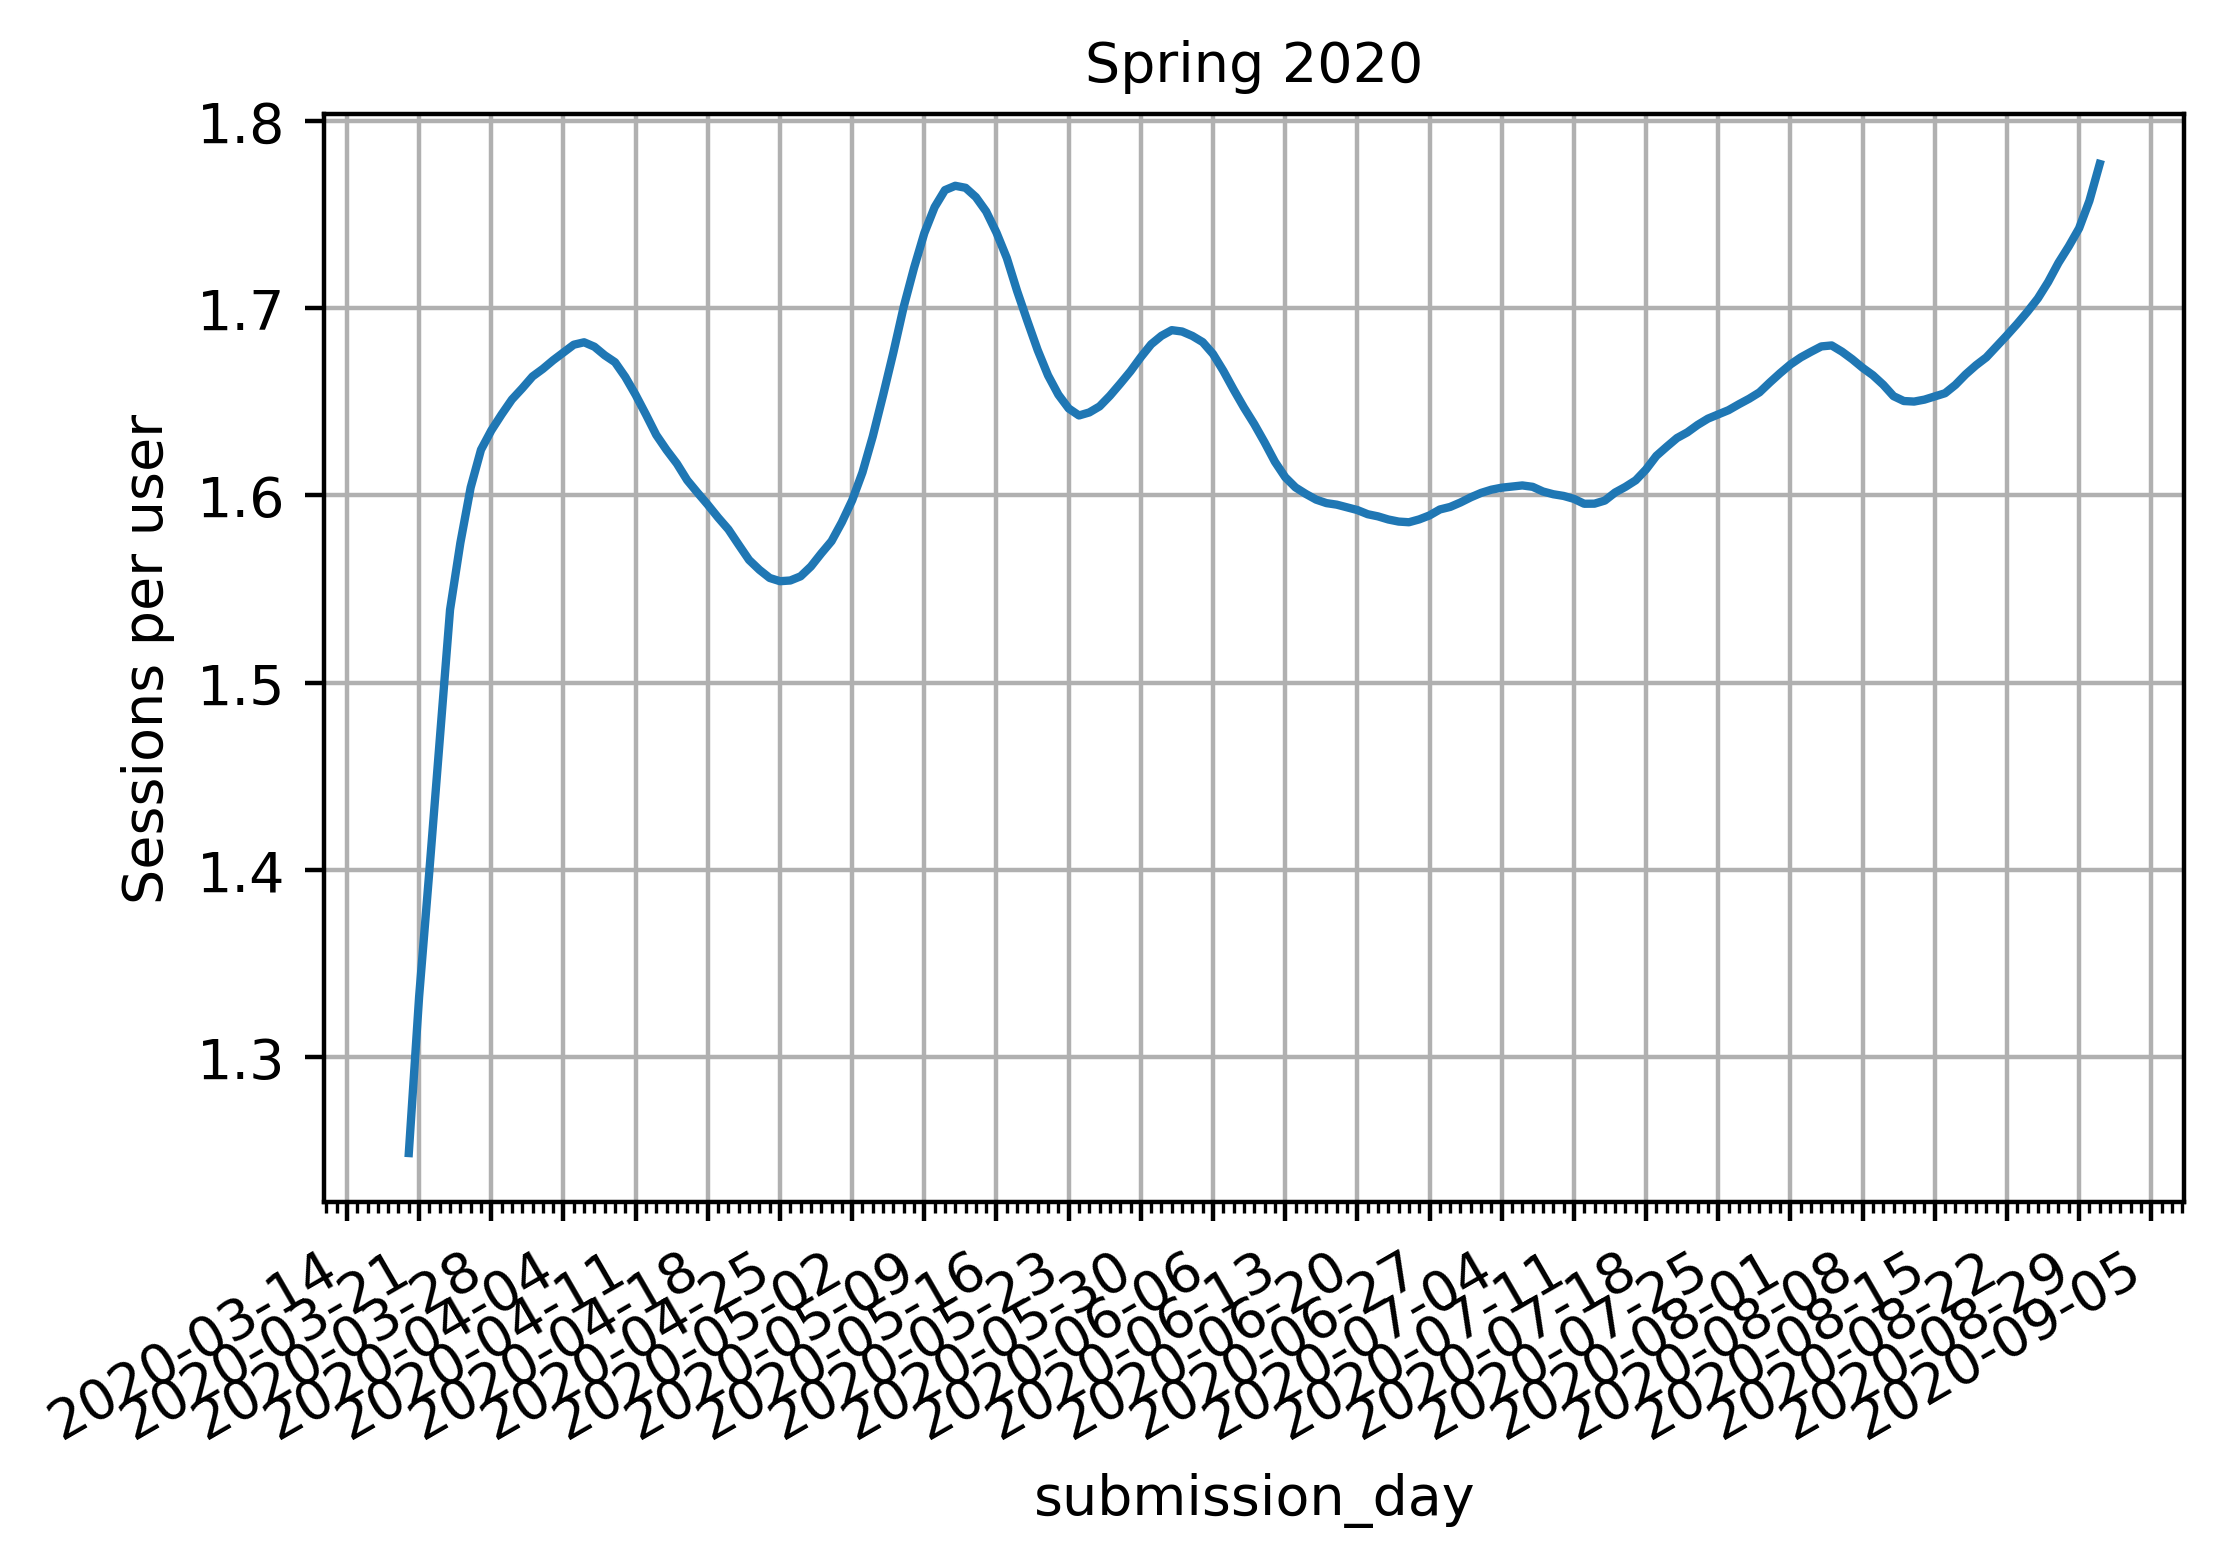

In [11]:
# число сессий на одного юзера в день 
sessions_per_user = das.copy(deep=True)
sessions_per_user['users per day'] = dau['users per day']
sessions_per_user['sessions per day/users per day'] = sessions_per_user['sessions per day']/sessions_per_user['users per day']


fig = plt.figure(dpi = 400)
plt.title('Spring 2020', fontsize=10)
plt.ylabel('Sessions per user', fontsize=10)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

sessions_per_user['sessions per day/users per day'].rolling(7).mean().plot(ax=ax)

fig.autofmt_xdate()

ax.grid(True)

plt.show()





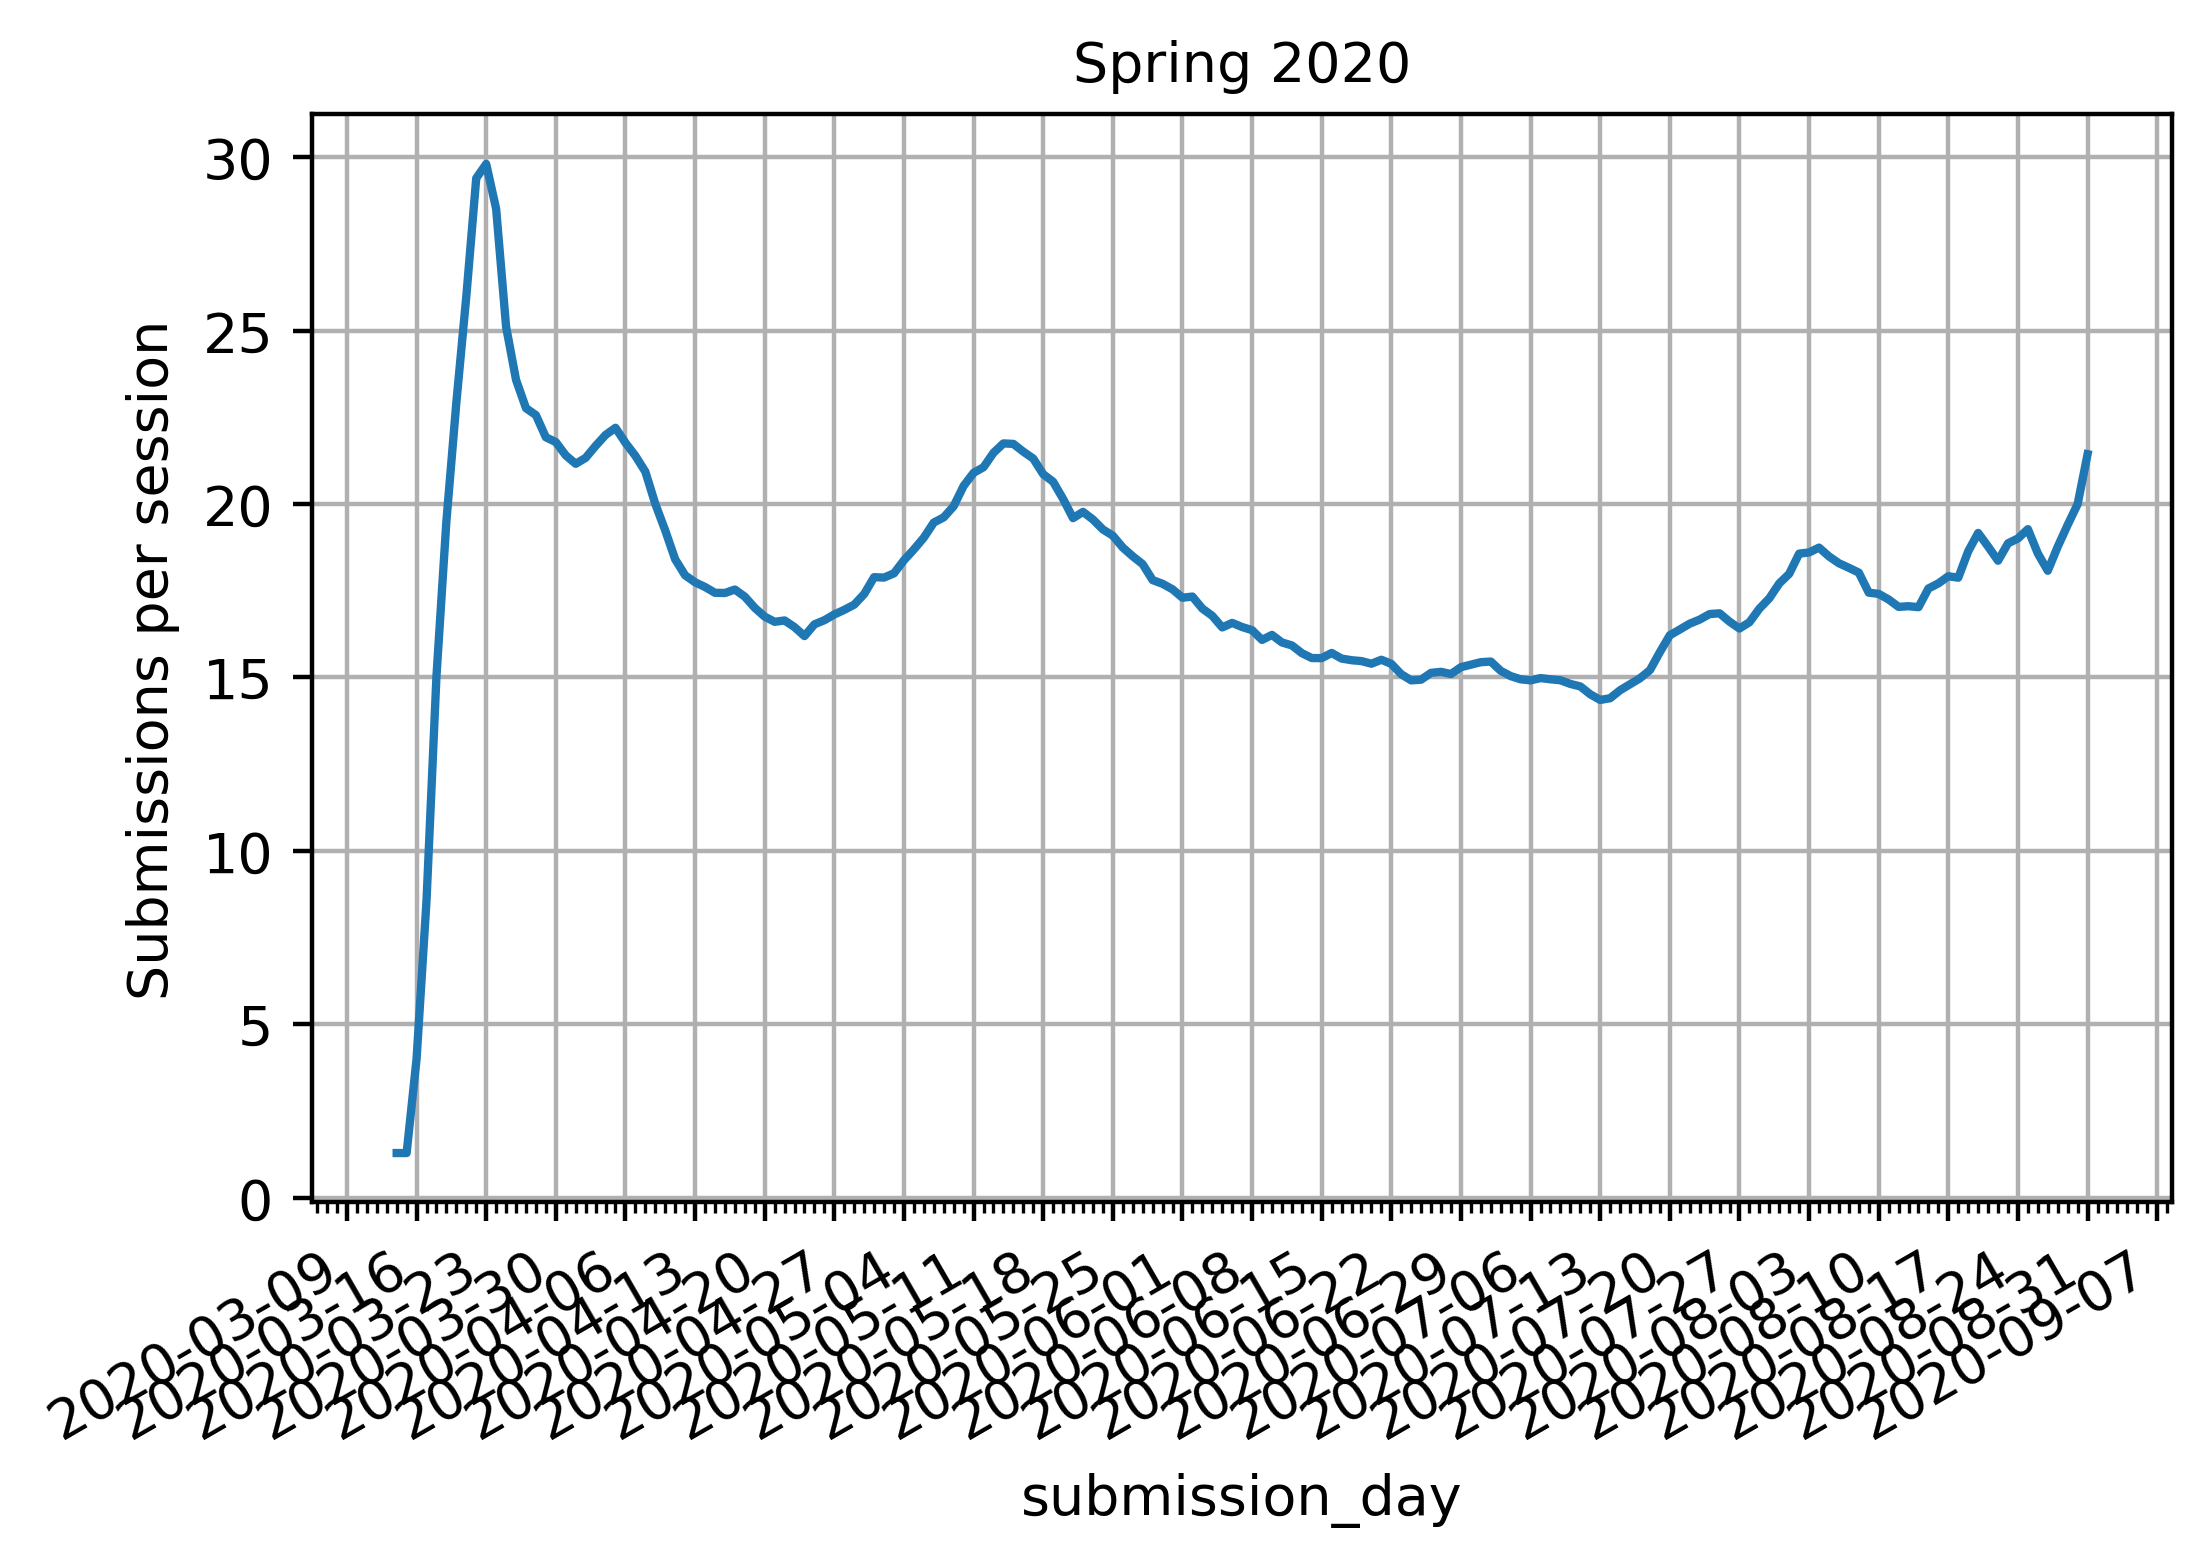

In [12]:
# AverageSubmission per session среднее число посылок за сессию

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['num_of_sessions'] = sessions['submission_time'].apply(lambda x: len(x))
sessions['num_of_submissions'] = sessions.apply({'submission_time': lambda x: sum([len(i) for i in x])})
asn = sessions.groupby('submission_day').sum()
asn['submission per session'] = asn['num_of_submissions']/asn['num_of_sessions']

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)


plt.title('Spring 2020', fontsize=10)
plt.ylabel('Submissions per session', fontsize=10)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

asn['submission per session'].rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()





In [9]:
# средний промежуток между посылками в сессии


def interval_in_session(cur_session):
    delays = []
    prev_date = cur_session[0]
    for cur_date in cur_session[1:]:
        delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm')) #переведем интервал в минуты
        prev_date = cur_date
    return delays

def interval(sessions):
    delays = []
    for session in sessions:
        delays+=interval_in_session(session)
    if delays == []:
        return 0
    return np.mean(delays)

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions = sessions.reset_index(level=['submission_day','user_id'])
sessions['interval_between_sessions'] = sessions['submission_time'].apply(lambda x: interval(x))
sessions.pop('submission_time')

sessions['count'] = 1
days = set(sessions['submission_day'])
graph = []
for day in days:
    ais = sessions[sessions['submission_day'] == day].interval_between_sessions.mean()
    graph.append([day,ais])
    
graph.sort(key = lambda x: x[0])
interval = pd.DataFrame([y[1] for y in graph], index = [x[0] for x in graph])


interval = interval.reset_index()
interval =interval[interval['index']>datetime.date(2020,3,18)]
interval.rename(columns={'index': 'submission_day'}, inplace=True)
interval = interval.set_index('submission_day')
interval.rename(columns={0 : 'interval in session'}, inplace=True)
interval


,interval in session
submission_day,
2020-03-19,2.297318
2020-03-20,2.560067
2020-03-21,3.075587
2020-03-22,3.404303
2020-03-23,3.173459
...,...
2020-08-27,4.315588
2020-08-28,4.053059
2020-08-29,4.126155


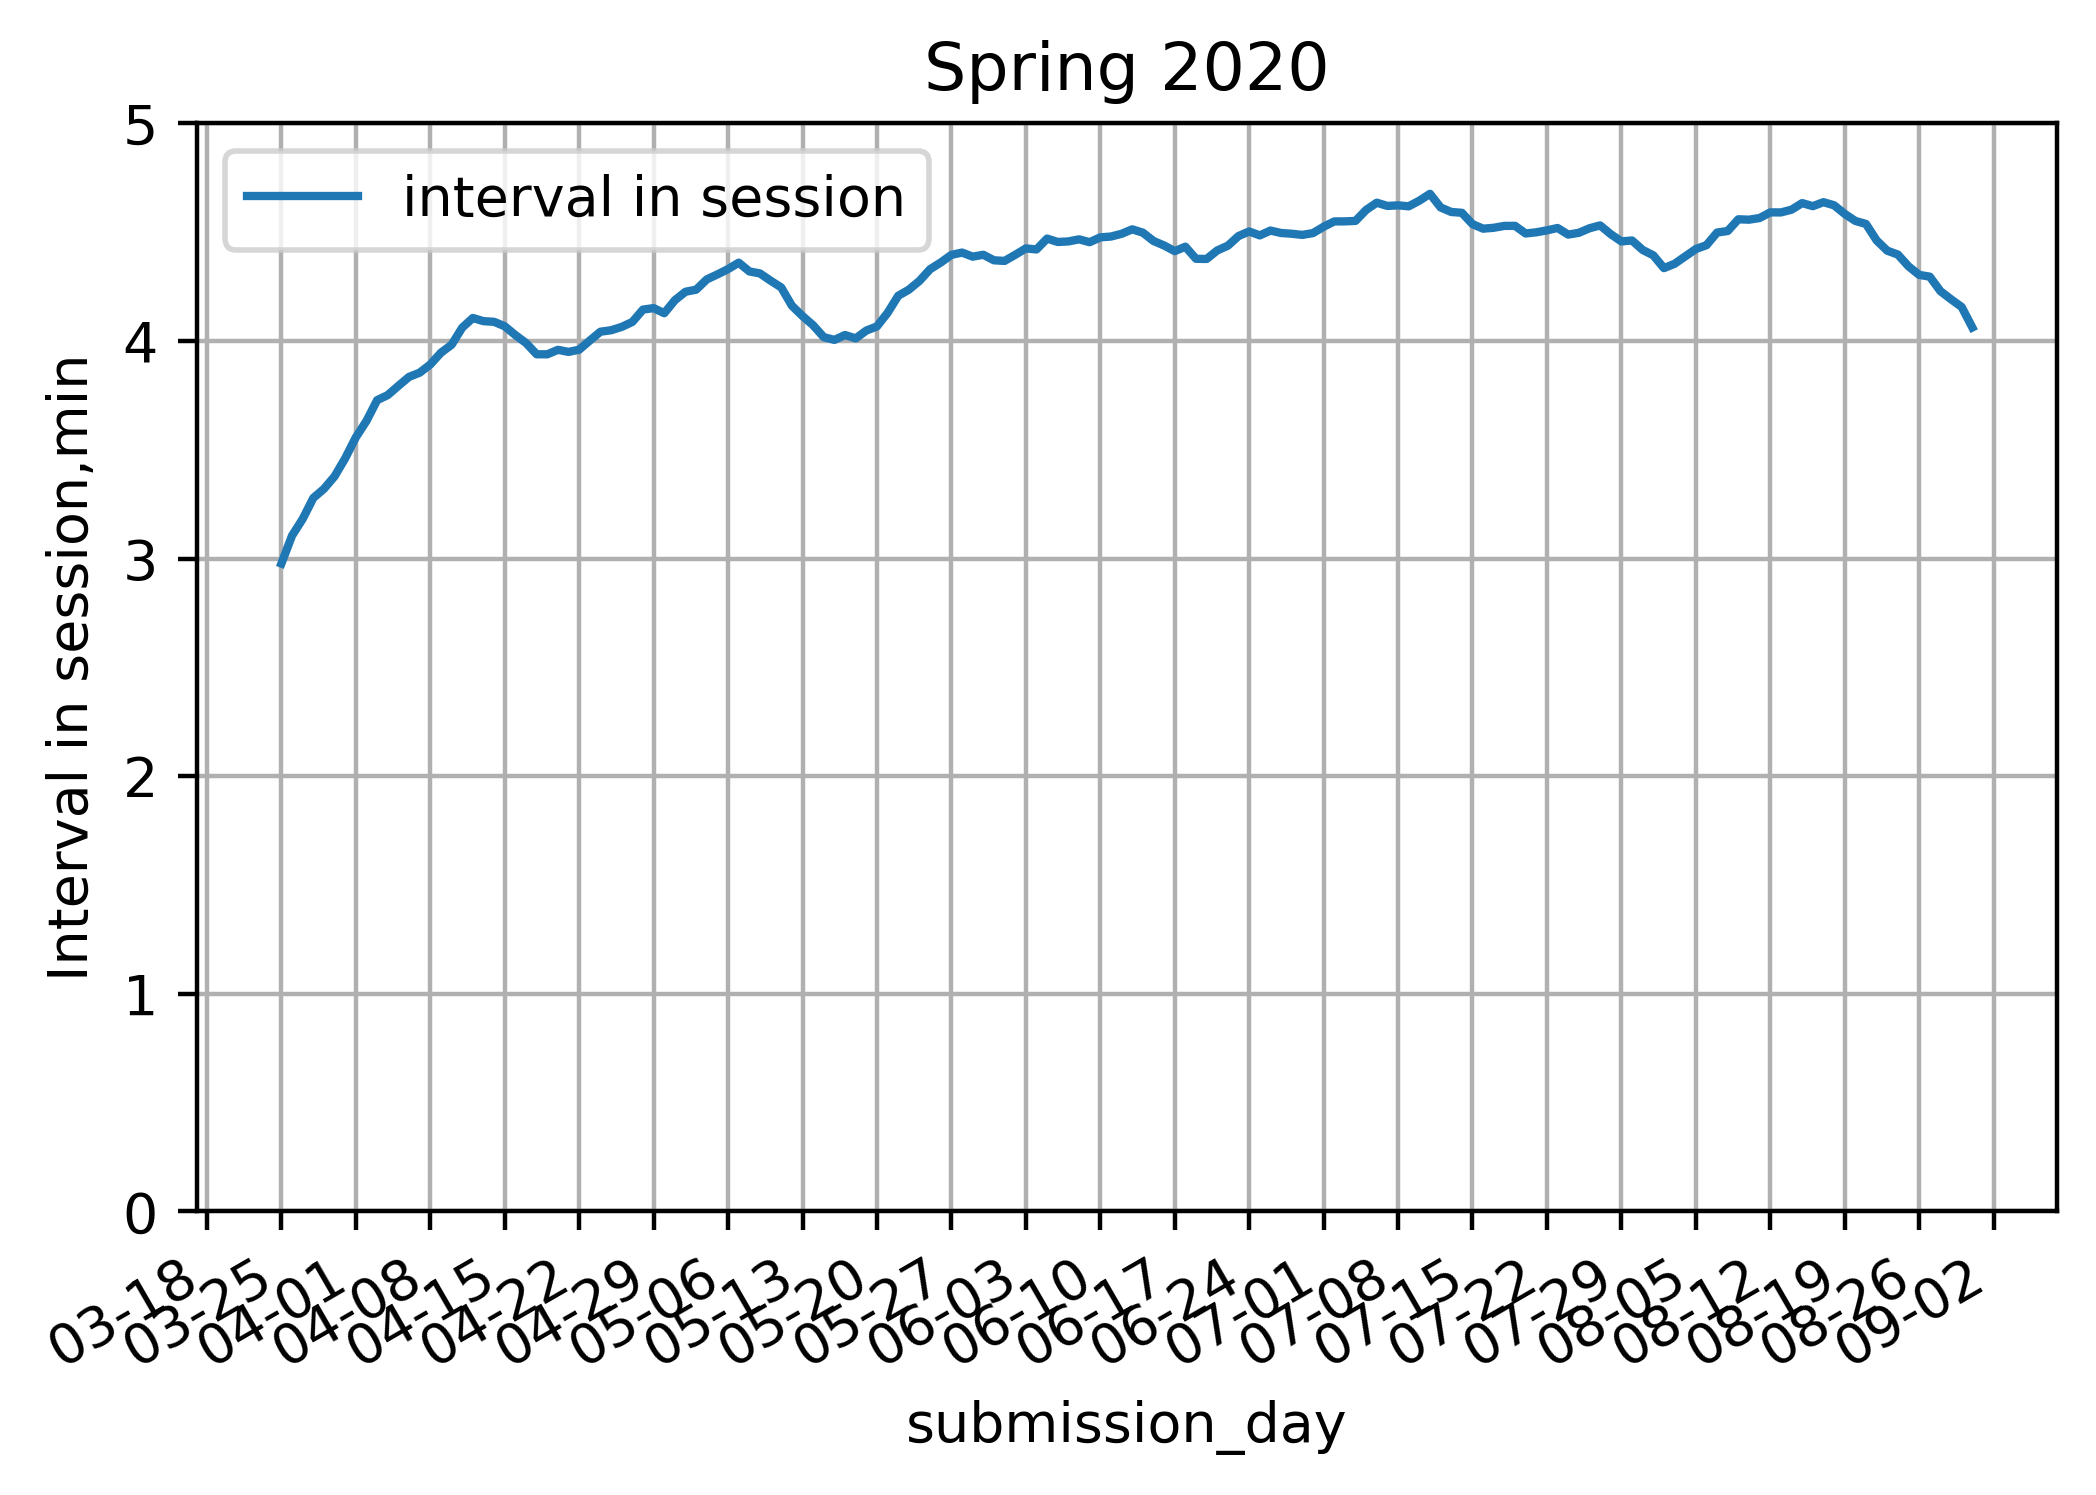

In [11]:

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111)
plt.title('Spring 2020')
plt.ylabel('Interval in session,min', fontsize=10)


#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

interval.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)
plt.ylim(0, 5)
plt.show()






<ipython-input-8-7b0913093ba1>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


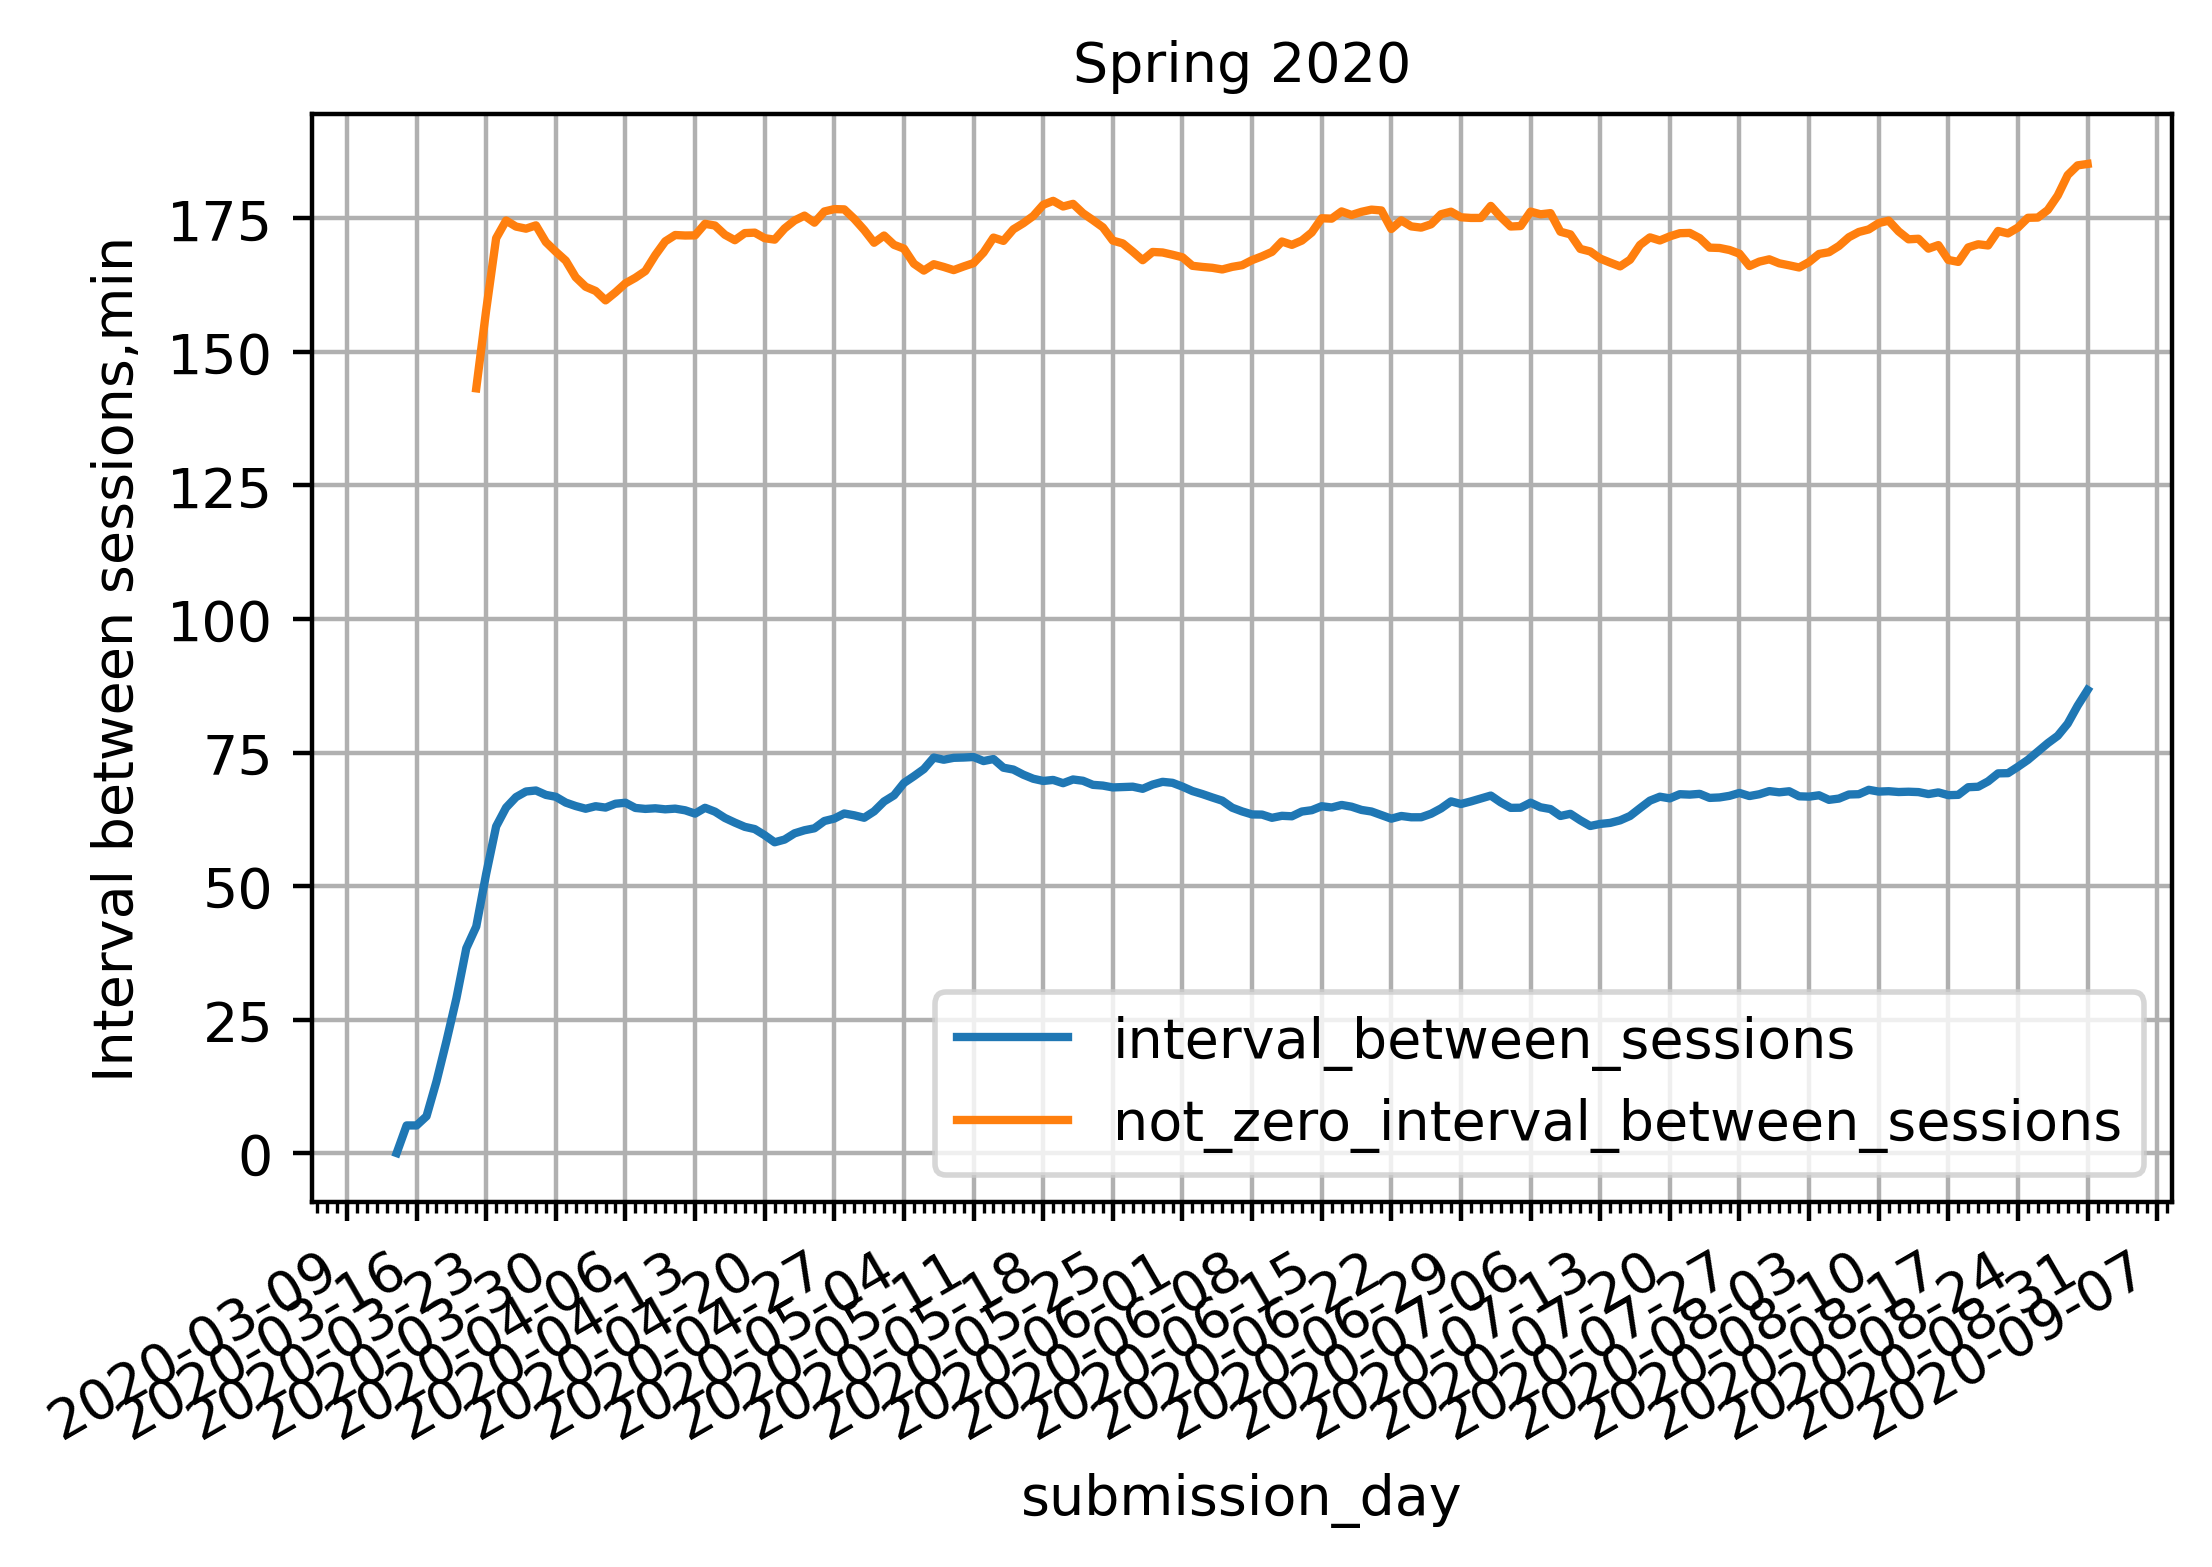

interval_between_sessions    63.41588
dtype: float64


In [8]:
# средний интервал между сессиями сглаженное
# кажется не очень информативно из-за большого количества нулей
# добавила еще подсчет среднего только не по нулевым интервалам
def session_interval(sessions):
    if len(sessions) == 1:
        return 0
    intervals = []
    end_prev = sessions[0][-1]
    for cur_session in sessions[1:]:
        start_cur = cur_session[0]
        intervals.append((start_cur - end_prev)/ np.timedelta64(1, 'm'))
        end_prev = cur_session[-1]
    return np.mean(intervals)
    

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions['interval_between_sessions']  = sessions['submission_time'].apply(lambda x: session_interval(x))
sessions.pop('submission_time')
intervals = sessions.groupby(['submission_day']).mean()
not_zero_intervals = sessions[sessions['interval_between_sessions'] != 0].groupby(['submission_day']).mean()
not_zero_intervals.rename(columns={'interval_between_sessions': 'not_zero_interval_between_sessions'}, inplace=True)

fig = plt.figure(dpi = 400)
plt.title('Spring 2020', fontsize=10)
plt.ylabel('Interval between sessions,min', fontsize=10)
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
intervals.rolling(7).mean().plot(ax=ax)
not_zero_intervals.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()



In [17]:
sample = np.array(not_zero_intervals['not_zero_interval_between_sessions'])
print(sample.mean())
print(sample.std(ddof=1))

170.3532452981476
13.10863821411859


<ipython-input-23-9d1cbcc70ee7>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


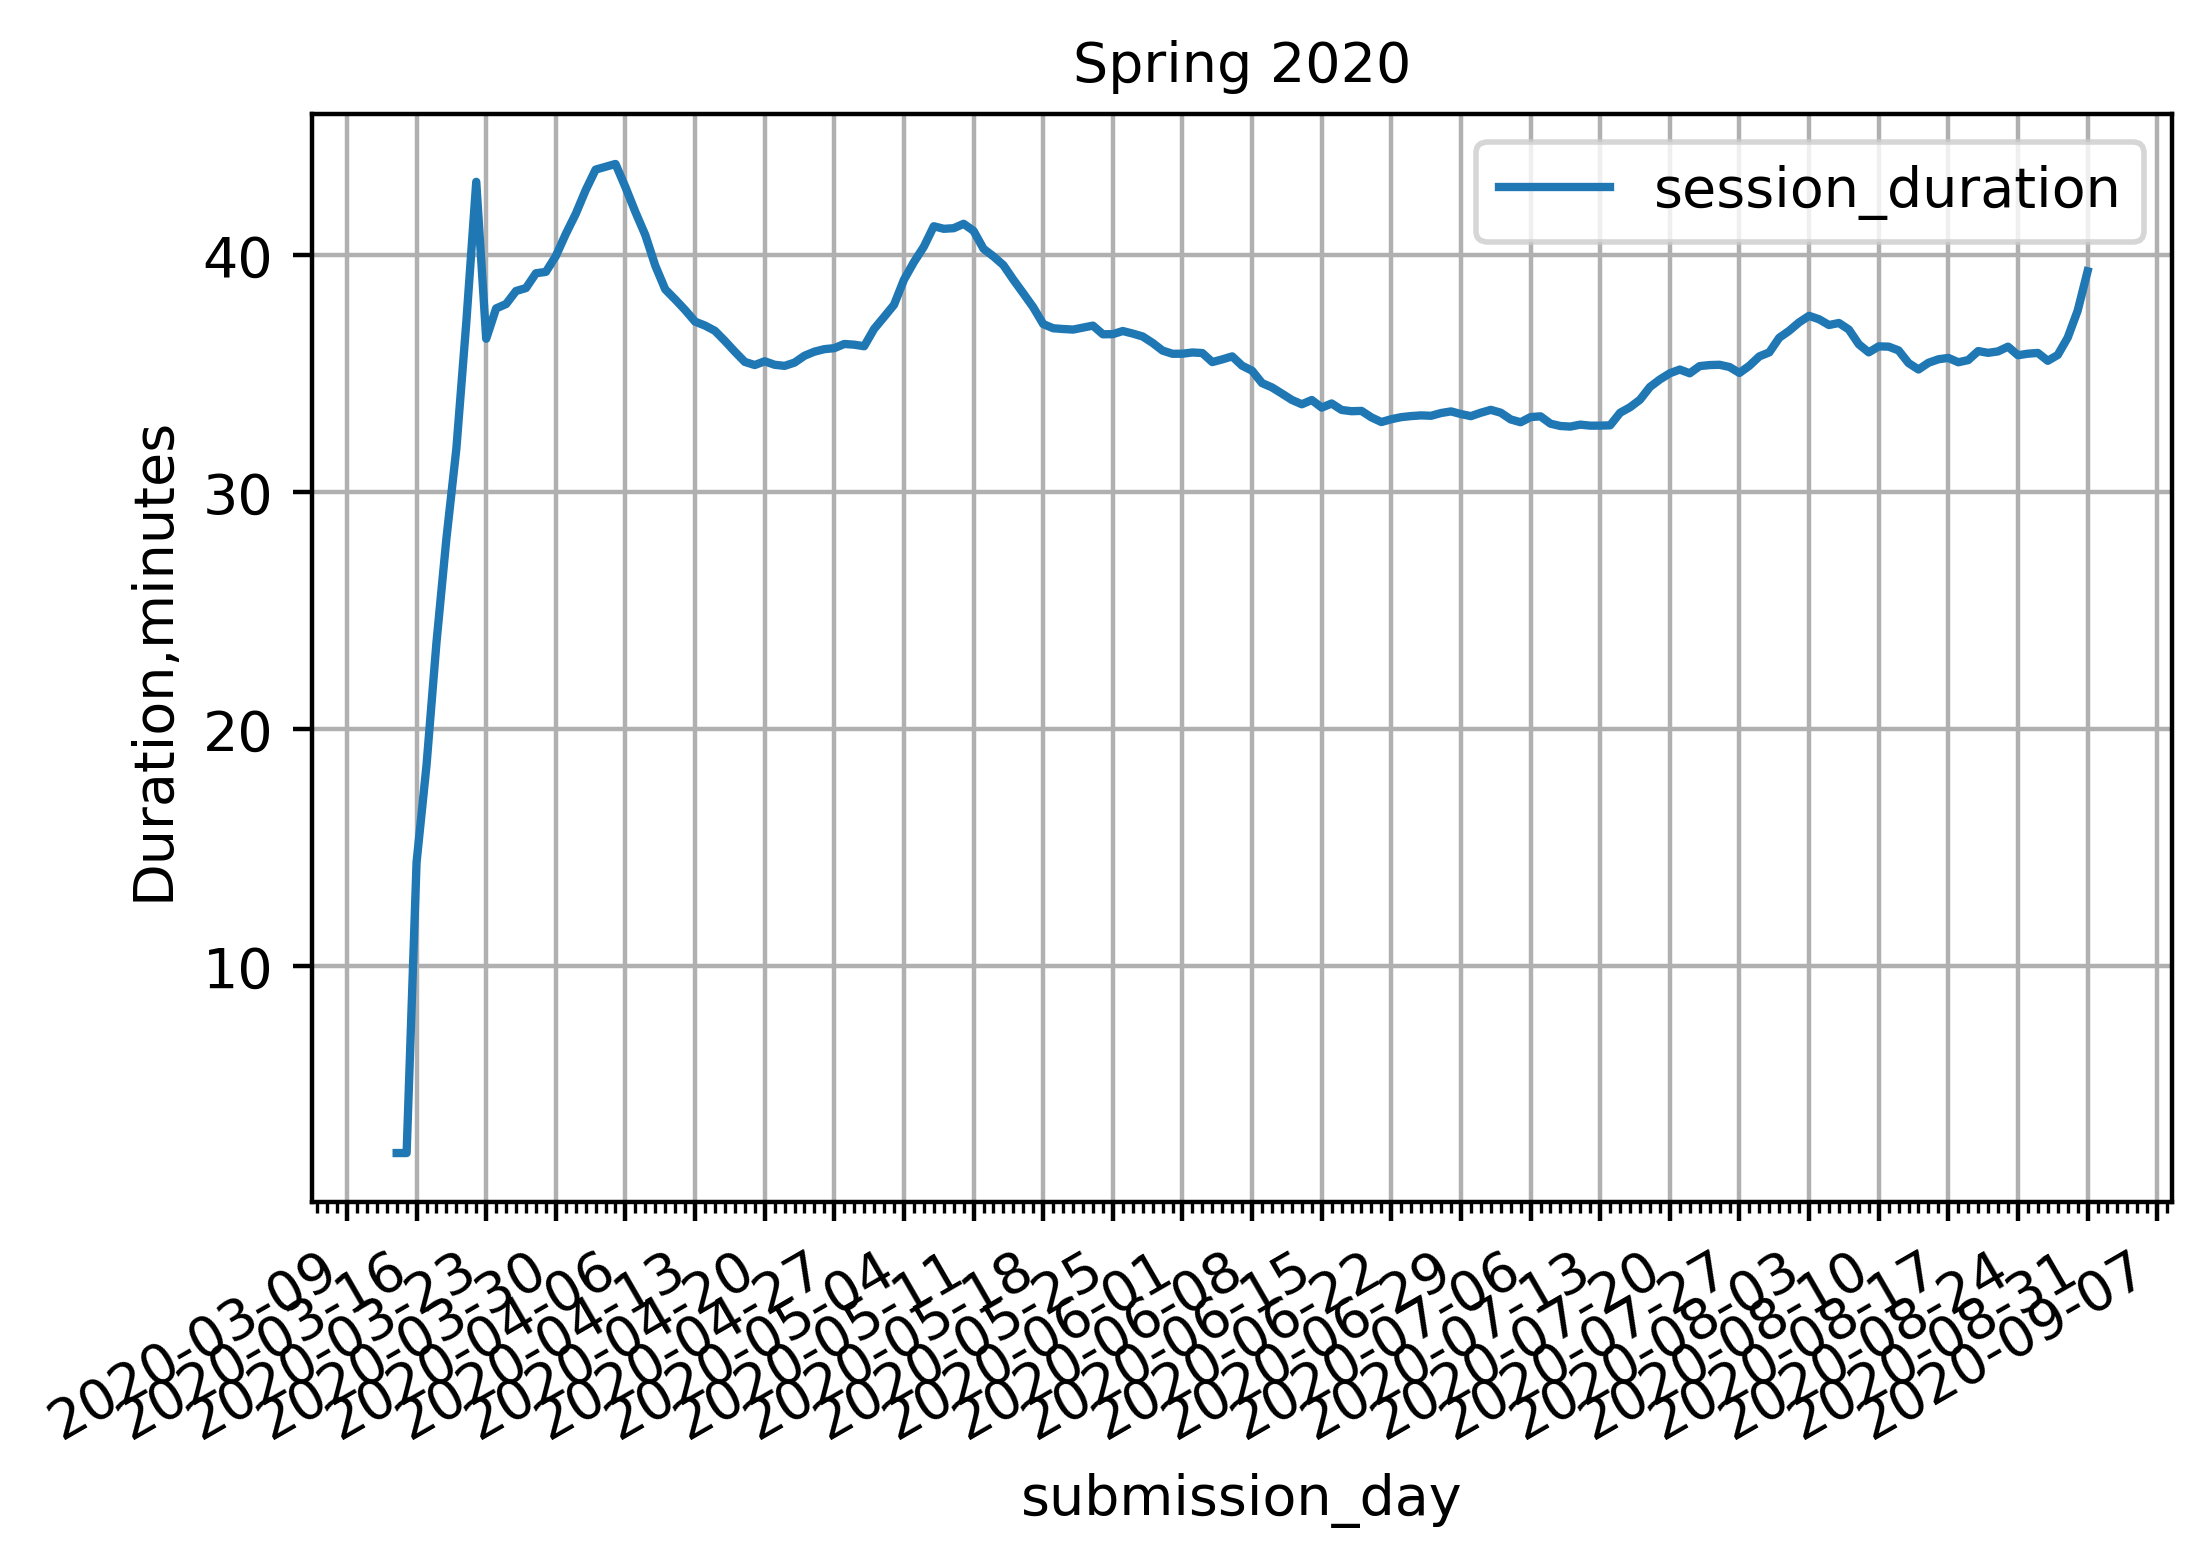

In [23]:
#  продолжительность сессии сглаженное

def session_duration(sessions):
    durations = [(session[-1]-session[0])/np.timedelta64(1, 'm') for session in sessions]
    return np.mean(durations)

tasks = df_best[df_best['course_element_type']=='task'].sort_values('submission_time')
tasks['submission_time'] = pd.to_datetime(tasks['submission_time'])
tasks['submission_day'] = tasks['submission_time'].apply(lambda x: x.date())
sessions = tasks.groupby(['submission_day','user_id']).agg({'submission_time': lambda x: split_session(x)})
sessions['session_duration']  = sessions['submission_time'].apply(lambda x: session_duration(x))
sessions.pop('submission_time')

duration = sessions.groupby('submission_day').mean()

fig = plt.figure(dpi = 400)
plt.ylabel('Duration,minutes', fontsize=10)
ax = fig.add_subplot(111)
plt.title('Spring 2020', fontsize=10)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

duration.rolling(7).mean().plot(ax=ax)
fig.autofmt_xdate()

ax.grid(True)

plt.show()

